In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
#sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
sys.path.insert(0, '../src')
import run_reb
import rebound
import numpy as np
import horizons_api
import tools
from bin_to_df import bin_to_df

import scipy.signal as signal


%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["figure.titlesize"] = 25

# First, an example of filtering an idealized signal

calculate and plot FFT power spectrum and lombscargle power spectrum

Do a really simple filtering procedure to zero out the "planet" frequencies

# Working with actual data

read in data for a classical belt object I'm sure isn't in or super close to a  mean motion resonance

In [30]:
#(keep the space in sbody, it's a typo from when I ran it, but the hash has the space)\
#this will take a while, it's a 100 Myr integration with a 500 year output cadence
sbody = '2004PY107'
objname = '2004 PY107'

#sbody = '2004KF19'
#objname = '2004KF19'
#path = 'Asteroids/'+objname
#path = 'TNOs/'+objname
sbody = '2'
objname = sbody

#sbody = '2004KF19'
#objname = '2004KF19'
dt=500.
path = 'Sims/AstFam/'+objname
#path = 'TNOs/'+objname

#these arrays are all a bit of a mess, at some point would want to 
#change it to be a multi-dimensional array for the planets so they 
#don't all have to be handled by hand
a = np.zeros(1);e = np.zeros(1);inc = np.zeros(1);
p = np.zeros(1);q = np.zeros(1);h = np.zeros(1);k = np.zeros(1);
pu = np.zeros(1);qu = np.zeros(1);hu = np.zeros(1);ku = np.zeros(1);
pj = np.zeros(1);qj = np.zeros(1);hj = np.zeros(1);kj = np.zeros(1);
ps = np.zeros(1);qs = np.zeros(1);hs = np.zeros(1);ks = np.zeros(1);
pn = np.zeros(1);qn = np.zeros(1);hn = np.zeros(1);kn = np.zeros(1);
omega = np.zeros(1);
Omega = np.zeros(1);
M = np.zeros(1)
t = np.zeros(1);
fullfile = 'Sims/AstFam/'+sbody+'/archive.bin'
print(fullfile)
arc1 = rebound.SimulationArchive(fullfile)
series = bin_to_df('AstFam',sbody,arc1,'8planet')
#series = pd.read_csv(path+'/series.csv')
t = series['t'].values
dt=int(t[1])/20
a = series['a'].values
e = series['ecc'].values
inc = series['inc'].values
#omega = series['omega'].values
#Omega = series['Omega'].values
#M = series['M'].values
h = series['h'].values
k = series['k'].values
p = series['p'].values
q = series['q'].values

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hmr = series['hmr'].values
kmr = series['kmr'].values
pmr = series['pmr'].values
qmr = series['qmr'].values

hv = series['hv'].values
kv = series['kv'].values
pv = series['pv'].values
qv = series['qv'].values

he = series['he'].values
ke = series['ke'].values
pe = series['pe'].values
qe = series['qe'].values

hmc = series['hmc'].values
kmc = series['kmc'].values
pmc = series['pmc'].values
qmc = series['qmc'].values

Sims/AstFam/2/archive.bin
['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']
<rebound.particle.Particle object at 0x7f0e05f8a400, m=0.0 x=-2.059215353890383 y=0.7190576923984224 z=-0.32440239291212514 vx=-2.1073064774864663 vy=-3.3326218368982063 vz=2.4716890020544096>
-2.059215353890383
<rebound.particle.Particle object at 0x7f0e1a681378, m=0.0 x=2.086323869678296 y=1.5699625330901352 z=-0.4523412031474178 vx=-2.963080446968709 vy=1.7826507824902564 vz=1.9108786812211564>
2.086323869678296
<rebound.particle.Particle object at 0x7f0e1a681378, m=0.0 x=2.8834392605725028 y=0.1797409083067032 z=1.707942549146123 vx=-0.8073563840278546 vy=2.920270413475434 vz=0.29375474289697723>
2.8834392605725028
<rebound.particle.Particle object at 0x7f0e1a681378, m=0.0 x=2.4815880625123348 y=-2.02816380349467 z=0.27423754690666585 vx=1.5255168616410921 vy=2.0465678043144617 vz=-1.9437700441930563>
2.4815880625123348
<rebound.particle.Particle object at 0x7f0e1a681378, m=0.0

<rebound.particle.Particle object at 0x7f0e1a681bf8, m=0.0 x=2.908792020891831 y=-1.3497434797636059 z=-1.4968496618000868 vx=0.5643446153364003 vy=2.587399539556617 vz=1.0205476676653218>
2.908792020891831
<rebound.particle.Particle object at 0x7f0e1a681bf8, m=0.0 x=2.4050075637967976 y=-1.9793540177055355 z=1.5391033045899096 vx=1.3315815848345498 vy=2.444417758660011 vz=0.8645961833344317>
2.4050075637967976
<rebound.particle.Particle object at 0x7f0e1a681bf8, m=0.0 x=1.0562979869782756 y=-3.004115038216455 z=0.6018208976702621 vx=2.5267741540315116 vy=0.6010708131131367 vz=-1.833440622976906>
1.0562979869782756
<rebound.particle.Particle object at 0x7f0e1a681bf8, m=0.0 x=-0.3775362675003987 y=-3.250382147119471 z=-1.8555159745074432 vx=2.509011678565038 vy=-0.6607118518050104 vz=-0.16952169182719648>
-0.3775362675003987
<rebound.particle.Particle object at 0x7f0e1a681bf8, m=0.0 x=-1.346342871294929 y=-2.57208962591188 z=-0.06942241227606663 vx=2.042203699451906 vy=-2.31692838171376

<rebound.particle.Particle object at 0x7f0e1a681378, m=0.0 x=2.418994983997143 y=0.4851067679428926 z=1.017649266574609 vx=-0.6703426517868014 vy=3.4005533507493166 vz=-1.8243102044763257>
2.418994983997143
<rebound.particle.Particle object at 0x7f0e1a681378, m=0.0 x=1.399914862047506 y=-1.8554466467260171 z=-1.1884346738299283 vx=1.9989778119435968 vy=3.2705623661176997 vz=-1.135739470615684>
1.399914862047506
<rebound.particle.Particle object at 0x7f0e1a681378, m=0.0 x=-0.5217519815258671 y=-3.302232892990154 z=-1.426514046689925 vx=2.5855034123991074 vy=0.0032914937268163293 vz=0.9056638124474481>
-0.5217519815258671
<rebound.particle.Particle object at 0x7f0e1a681378, m=0.0 x=-1.6587076978672917 y=-2.6660272843175084 z=1.3173584511485348 vx=2.464918230813001 vy=-1.0973417268454582 vz=1.3018860606258034>
-1.6587076978672917
<rebound.particle.Particle object at 0x7f0e1a681378, m=0.0 x=-2.793830659594285 y=-0.9129509710039233 z=1.4192836995012872 vx=0.2070837030307467 vy=-2.8575382960

<rebound.particle.Particle object at 0x7f0e1a681bf8, m=0.0 x=-3.167303984572913 y=-0.06870471194947142 z=0.25923278342923045 vx=-0.5445252779857891 vy=-2.631697274948395 vz=1.84894735680222>
-3.167303984572913
<rebound.particle.Particle object at 0x7f0e1a681bf8, m=0.0 x=-1.2853029952190553 y=1.9614386067431078 z=1.752316459378185 vx=-3.198942015427086 vy=-1.5359070563094033 vz=0.367869364095747>
-1.2853029952190553
<rebound.particle.Particle object at 0x7f0e1a681bf8, m=0.0 x=-0.26799043192184097 y=2.2892684825943337 z=-0.3150685867550387 vx=-3.7800793591557533 vy=0.9795213694235906 vz=-2.109982258363214>
-0.26799043192184097
<rebound.particle.Particle object at 0x7f0e1a681bf8, m=0.0 x=2.0413245048091793 y=-0.9898606144252085 z=0.02750298061356821 vx=0.7800956292416771 vy=3.6458917604855148 vz=-2.599851464396834>
2.0413245048091793
<rebound.particle.Particle object at 0x7f0e1a681bf8, m=0.0 x=0.7998653280569401 y=-1.8839607985336237 z=-1.43587709403482 vx=3.7369949519359387 vy=1.71985134

<rebound.particle.Particle object at 0x7f0e1a681bf8, m=0.0 x=-1.283455597631526 y=-2.095576978132866 z=1.4364532315411314 vx=2.886105977069986 vy=-1.6649781944220663 vz=-1.546358298844381>
-1.283455597631526
<rebound.particle.Particle object at 0x7f0e1a681e18, m=0.0 x=-2.5995334454895884 y=0.048707988605999654 z=-0.9954510597399981 vx=1.1810223480537911 vy=-3.279003842238418 vz=-1.3966700622006123>
-2.5995334454895884
<rebound.particle.Particle object at 0x7f0e1a681e18, m=0.0 x=-2.5108005161892137 y=2.334603565068963 z=-1.6000014214664842 vx=-1.540674418267918 vy=-1.9044080553762026 vz=0.8015363486661036>
-2.5108005161892137
<rebound.particle.Particle object at 0x7f0e1a681e18, m=0.0 x=-1.0251772777261556 y=3.152197327355099 z=0.8449223468166093 vx=-2.427579988557629 vy=-0.6233995512892047 vz=1.596271708251576>
-1.0251772777261556
<rebound.particle.Particle object at 0x7f0e1a681e18, m=0.0 x=1.3645434283356062 y=2.1308589185453473 z=1.5290265501403728 vx=-2.3736962067868173 vy=2.56744088

<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=1.1015866062323048 y=2.0802233496682963 z=-0.4275319006904146 vx=-3.1572588081381983 vy=1.6394781802894227 vz=-2.4730346214423498>
1.1015866062323048
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=1.484107426806898 y=-0.6864487355949704 z=-0.8057918869736177 vx=0.5015328535116343 vy=5.279766334987563 vz=-0.9123827496229823>
1.484107426806898
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=0.6411786308346785 y=-2.615839222712001 z=-1.587354726647279 vx=2.92425565999073 vy=1.2391317012568128 vz=0.9633439768827343>
0.6411786308346785
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=-1.3156639516154456 y=-2.4474003672000504 z=1.2208267440668636 vx=3.1236149004487035 vy=-0.6174323370902335 vz=1.2808138451826483>
-1.3156639516154456
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=-3.0937457056226076 y=-1.0481201279808297 z=1.515676946621738 vx=0.6312223600977591 vy=-2.478674283161

<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=-3.0124199198414345 y=0.8383750219913864 z=0.21436843290074317 vx=-0.26006594766099783 vy=-2.7007082038260553 vz=1.9097055913884424>
-3.0124199198414345
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=-2.2253334235909663 y=2.454774404195028 z=1.876844687150065 vx=-2.0296518790328895 vy=-1.5177508473583063 vz=-0.23860380629636668>
-2.2253334235909663
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=-1.0090770517892307 y=2.9467699830305354 z=-0.34435093774922115 vx=-2.857715169824371 vy=-0.07044956382181895 vz=-1.6671564609389171>
-1.0090770517892307
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=1.5055852968130727 y=1.5073172034444853 z=-1.672631528740492 vx=-2.424293703888342 vy=2.977169761839508 vz=-0.38459580063065996>
1.5055852968130727
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=2.2179595679135167 y=0.8686327314192175 z=0.5476018629699354 vx=-0.3729254482980129 vy=3.

<rebound.particle.Particle object at 0x7f0e1a681f28, m=0.0 x=-0.9956731589460491 y=2.564987124982084 z=0.9609095153957532 vx=-3.293424606158837 vy=-0.06413431393134608 vz=-1.4321836225683402>
-0.9956731589460491
<rebound.particle.Particle object at 0x7f0e1a681f28, m=0.0 x=0.8509867844435598 y=2.3679299350808027 z=-1.7353898954493732 vx=-2.948482729797362 vy=1.509154843198373 vz=-0.7688726578889273>
0.8509867844435598
<rebound.particle.Particle object at 0x7f0e1a681f28, m=0.0 x=1.465228066019464 y=1.4894290826095251 z=-0.23987712115289808 vx=-1.4513391269576048 vy=4.1671836937392275 vz=1.9446765822492873>
1.465228066019464
<rebound.particle.Particle object at 0x7f0e1a681f28, m=0.0 x=1.0186181275743036 y=-1.959739226044108 z=-0.00949075483824755 vx=3.067975648909849 vy=2.470387968243753 vz=2.4581020052842204>
1.0186181275743036
<rebound.particle.Particle object at 0x7f0e1a681f28, m=0.0 x=0.015924620107229844 y=-1.9695812104772306 z=1.317752231903493 vx=4.145899592258684 vy=-0.33854432546

<rebound.particle.Particle object at 0x7f0e1a681c80, m=0.0 x=-3.17648477460418 y=0.9493900397981064 z=1.654464349188523 vx=-0.4928847218424251 vy=-2.4202989632029137 vz=1.008260263397332>
-3.17648477460418
<rebound.particle.Particle object at 0x7f0e1a681c80, m=0.0 x=-1.775037005740184 y=2.3209938223784423 z=1.051465066530404 vx=-2.8020302397766543 vy=-1.0704286556155302 vz=-1.4905066959246056>
-1.775037005740184
<rebound.particle.Particle object at 0x7f0e1a681c80, m=0.0 x=-0.2866566009486394 y=2.857540895873187 z=-1.7900715225195698 vx=-2.9447023061235127 vy=0.30725804433811177 vz=-0.5982551244259071>
-0.2866566009486394
<rebound.particle.Particle object at 0x7f0e1a681c80, m=0.0 x=1.032402956229411 y=1.739086819276573 z=-0.6155493260587614 vx=-2.4027579028843435 vy=3.87905238491098 vz=1.4830022115397696>
1.032402956229411
<rebound.particle.Particle object at 0x7f0e1a681c80, m=0.0 x=1.6406251004592798 y=-1.593196488922586 z=-0.03941378739368081 vx=2.3386539861004305 vy=2.905292318146199

<rebound.particle.Particle object at 0x7f0e1a681e18, m=0.0 x=-0.8217824339766623 y=-1.542675297981946 z=1.1440360034609118 vx=4.6764998553675 vy=-1.3161523804491566 vz=0.05030980975261492>
-0.8217824339766623
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=-2.8449216951485448 y=-0.1917519565749212 z=1.4881358985855484 vx=0.786486141613687 vy=-2.870426094924358 vz=-1.20706435389742>
-2.8449216951485448
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=-2.5466593621056233 y=1.15214509113441 z=-1.4628143347683302 vx=-0.6062240644105453 vy=-3.113668271599036 vz=-0.8684818586919048>
-2.5466593621056233
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=-1.3862932161514676 y=2.8972127506978147 z=-0.712810765241257 vx=-2.3243024646331545 vy=-1.1393483871843542 vz=1.747041040820387>
-1.3862932161514676
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=-0.07247664374717415 y=3.4107026476364783 z=1.7580263570864172 vx=-2.4647213334385465 vy=0.03418349

<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=-2.4721978922135266 y=1.8890658194478458 z=-0.03131296117713788 vx=-1.476505510162117 vy=-2.3072535489275907 vz=-1.9211001868609772>
-2.4721978922135266
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=-1.6951750222050692 y=2.9315245233155487 z=-1.8102335474296138 vx=-2.211882032827164 vy=-1.103263209857232 vz=0.4771334847366128>
-1.6951750222050692
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=-0.522519623018174 y=3.1701838183479394 z=0.65687482335547 vx=-2.5751334628908995 vy=-0.19310453407755082 vz=1.787242319541233>
-0.522519623018174
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=1.5297155154161861 y=2.1380315209034135 z=1.4938435778060086 vx=-2.205624957344005 vy=2.542924345246757 vz=-0.7209864559730699>
1.5297155154161861
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=2.3410945184923935 y=1.5696113169262178 z=-1.5675753263820882 vx=-1.2196843596069191 vy=2.75195965

<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=-1.1172862790640359 y=-0.9259546287058177 z=0.7934715147782276 vx=4.538832066093073 vy=-3.5650884920817343 vz=0.5238942932848842>
-1.1172862790640359
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=-2.3331099082305795 y=-0.3729280370706257 z=0.9822226601939488 vx=0.7461662805739883 vy=-3.406024592818657 vz=-2.134945097987649>
-2.3331099082305795
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=-1.9766922883472482 y=0.1315930078581858 z=-1.337055039349436 vx=-0.03161040540598055 vy=-4.284550501556914 vz=0.6682350090018835>
-1.9766922883472482
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=-1.3923257931237416 y=2.39969508355717 z=-0.17574957514656755 vx=-1.8651617903785627 vy=-2.6954450120024873 vz=1.847837802782112>
-1.3923257931237416
<rebound.particle.Particle object at 0x7f0e1a681510, m=0.0 x=-1.048846612885186 y=2.7404990850624835 z=1.8227157881021492 vx=-2.4343170954274798 vy=-1.5851

<rebound.particle.Particle object at 0x7f0e1a681268, m=0.0 x=1.7137102633700698 y=-1.212969535600675 z=0.4146465054366727 vx=1.4667641754557297 vy=3.893089912000759 vz=2.3180945820065166>
1.7137102633700698
<rebound.particle.Particle object at 0x7f0e1a681268, m=0.0 x=1.9926415110740032 y=-1.250803895550649 z=0.2957777012429067 vx=2.304025907261101 vy=2.702514382819233 vz=-2.536087240621096>
1.9926415110740032
<rebound.particle.Particle object at 0x7f0e1a681268, m=0.0 x=-0.2496001213759813 y=-1.69779974340673 z=-0.7158840265363146 vx=5.099642924023698 vy=0.9470405800988632 vz=-1.1273975602540096>
-0.2496001213759813
<rebound.particle.Particle object at 0x7f0e1a681268, m=0.0 x=-1.6048240459274166 y=-2.0279083329632543 z=-1.1160656463216998 vx=2.8501075481938876 vy=-1.7658349281198298 vz=1.5909635137629023>
-1.6048240459274166
<rebound.particle.Particle object at 0x7f0e1a681268, m=0.0 x=-1.9782675200247526 y=-0.9275290226739583 z=1.6021499226151834 vx=2.243529064930114 vy=-3.1408010351619

<rebound.particle.Particle object at 0x7f0e1a681268, m=0.0 x=-2.4653810296182423 y=1.0390096642127191 z=-1.699300000678779 vx=-0.7782195146786355 vy=-3.114892968186669 vz=0.6309198436409361>
-2.4653810296182423
<rebound.particle.Particle object at 0x7f0e1a681268, m=0.0 x=-1.6875157138207488 y=2.1467359887504136 z=1.1021423287441725 vx=-1.6135639479927362 vy=-2.816992701197084 vz=1.4297248723571263>
-1.6875157138207488
<rebound.particle.Particle object at 0x7f0e1a681268, m=0.0 x=-0.7876500644945479 y=3.295458714073217 z=1.1588019156029354 vx=-2.35633970359204 vy=-0.9016156119627682 vz=-1.221568200542709>
-0.7876500644945479
<rebound.particle.Particle object at 0x7f0e1a681268, m=0.0 x=-0.29397716467908935 y=3.3031336637867437 z=-1.8045733338177727 vx=-2.4759805256105505 vy=-0.48381530140948764 vz=-0.5615200504703829>
-0.29397716467908935
<rebound.particle.Particle object at 0x7f0e1a681268, m=0.0 x=0.8773897368518463 y=3.0577487926423363 z=-0.13842256077687676 vx=-2.398812301809847 vy=0.8

<rebound.particle.Particle object at 0x7f0e1a681f28, m=0.0 x=0.6442428277738013 y=2.8671040770905467 z=-1.707017092355659 vx=-2.6409346547921193 vy=1.1409643268515175 vz=-0.8381447788639154>
0.6442428277738013
<rebound.particle.Particle object at 0x7f0e1a681f28, m=0.0 x=1.3408197389884793 y=1.9530634459428564 z=-0.822622864628237 vx=-1.876910045300758 vy=3.4001508535069545 vz=1.474550705194648>
1.3408197389884793
<rebound.particle.Particle object at 0x7f0e1a681f28, m=0.0 x=2.283680340957623 y=0.04126297638566858 z=1.33484658084429 vx=-0.16335264499792315 vy=3.755501891716001 vz=1.2409156437076687>
2.283680340957623
<rebound.particle.Particle object at 0x7f0e1a681f28, m=0.0 x=2.31546798108343 y=-0.20432710216570446 z=-0.45129598591304027 vx=1.2363894635548915 vy=3.4931632369086016 vz=-2.3302092926454945>
2.31546798108343
<rebound.particle.Particle object at 0x7f0e1a681f28, m=0.0 x=0.08966644223501401 y=-1.632566638908992 z=-0.6395526692115643 vx=5.011628998087305 vy=1.5961453724673054 v

<rebound.particle.Particle object at 0x7f0e1a681268, m=0.0 x=1.694867675674943 y=1.7557801390517374 z=1.5526240179798685 vx=-1.8659522665616217 vy=3.072949032375983 vz=-0.38304933316557904>
1.694867675674943
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=2.113349368637951 y=1.6894365539547287 z=-1.6388971698256152 vx=-1.4286903184887871 vy=2.721838570555646 vz=-1.156713414376866>
2.113349368637951
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=1.9698568749468721 y=0.9953660844202361 z=-0.6917273914721297 vx=0.1250797474449041 vy=4.207222130091915 vz=1.490473500265825>
1.9698568749468721
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=1.879901960546856 y=-1.0167568848464732 z=1.2620016105635725 vx=1.6751143711595342 vy=3.607122454389988 vz=1.3360859466353103>
1.879901960546856
<rebound.particle.Particle object at 0x7f0e1a681d90, m=0.0 x=2.0307968677648995 y=-1.119948506402997 z=-0.5277172414339747 vx=2.343000945933155 vy=2.7699481116383935 vz=-2.

In [29]:
sbody = '2004PY107'
objname = '2004 PY107'

#sbody = '2004KF19'
#objname = '2004KF19'
#path = 'Asteroids/'+objname
path = 'TNOs/'+objname

archive = rebound.SimulationArchive(path+'/archive.bin')
series = bin_to_df.bin_to_df(objname,archive)

t = series['t'].values
a = series['a'].values
e = series['ecc'].values
inc = series['inc'].values

h = series['h'].values
k = series['k'].values
p = series['p'].values
q = series['q'].values

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hmr = series['hmr'].values
kmr = series['kmr'].values
pmr = series['pmr'].values
qmr = series['qmr'].values

hv = series['hv'].values
kv = series['kv'].values
pv = series['pv'].values
qv = series['qv'].values

he = series['he'].values
ke = series['ke'].values
pe = series['pe'].values
qe = series['qe'].values

hmc = series['hmc'].values
kmc = series['kmc'].values
pmc = series['pmc'].values
qmc = series['qmc'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

RuntimeError: Cannot read binary file. Check filename and file contents.

In [4]:
print(t)

[0.00000000e+00 1.00008000e+02 2.00004000e+02 ... 9.99800003e+05
 9.99900011e+05 1.00000000e+06]


do all the FFTs for the inclination and eccentricity vectors

In [31]:
#set up all the FFT power spectra, etc
#the outputs are not exact, but it's about 
dt = 1000
n = len(h)
freq = np.fft.rfftfreq(n,d=dt)

#particle eccentricity vectors
Yh= np.fft.rfft(h)
Yk = np.fft.rfft(k)
#giant planets
Yhmc = np.fft.rfft(hmc)
Yhv = np.fft.rfft(hv)
Yhe = np.fft.rfft(he)
Yhmr = np.fft.rfft(hmr)
Ykmc = np.fft.rfft(kmc)
Ykv = np.fft.rfft(kv)
Yke = np.fft.rfft(ke)
Ykmr = np.fft.rfft(kmr)
Yhu = np.fft.rfft(hu)
Yhj = np.fft.rfft(hj)
Yhn = np.fft.rfft(hn)
Yhs = np.fft.rfft(hs)
Yku = np.fft.rfft(ku)
Ykj = np.fft.rfft(kj)
Ykn = np.fft.rfft(kn)
Yks = np.fft.rfft(ks)

#convert to power
pYh = np.abs(Yh)
pYk = np.abs(Yk)

pYhmc = np.abs(Yhmc)
pYhv = np.abs(Yhv)
pYhe = np.abs(Yhe)
pYhmr = np.abs(Yhmr)
pYkmc = np.abs(Ykmc)
pYkmr = np.abs(Ykmr)
pYkv = np.abs(Ykv)
pYke = np.abs(Yke)

pYhu = np.abs(Yhu)
pYhn = np.abs(Yhn)
pYhj = np.abs(Yhj)
pYhs = np.abs(Yhs)
pYku = np.abs(Yku)
pYkn = np.abs(Ykn)
pYkj = np.abs(Ykj)
pYks = np.abs(Yks)


#find the max power and indexes of that max power
#(disregarding the frequency=0 terms)
kumax = pYku[1:].max()
knmax = pYkn[1:].max()
ksmax = pYks[1:].max()
kjmax = pYkj[1:].max()
humax = pYhu[1:].max()
hnmax = pYhn[1:].max()
hsmax = pYhs[1:].max()
hjmax = pYhj[1:].max()

kmcmax = pYkmc[1:].max()
kmrmax = pYkmr[1:].max()
kvmax = pYkv[1:].max()
kemax = pYke[1:].max()
hmcmax = pYhmc[1:].max()
hmrmax = pYhmr[1:].max()
hvmax = pYhv[1:].max()
hemax = pYhe[1:].max()

#(these need the plus 1 to account for neglecting the f=0 term)
ihmax = np.argmax(pYh[1:])+1
ikmax = np.argmax(pYk[1:])+1
ihumax = np.argmax(pYhu[1:])+1
ihnmax = np.argmax(pYhn[1:])+1 
ihsmax = np.argmax(pYhs[1:])+1 
ihjmax = np.argmax(pYhj[1:])+1 
ikumax = np.argmax(pYku[1:])+1 
iknmax = np.argmax(pYkn[1:])+1
iksmax = np.argmax(pYks[1:])+1
ikjmax = np.argmax(pYkj[1:])+1 

ihmcmax = np.argmax(pYhmc[1:])+1
ihmrmax = np.argmax(pYhmr[1:])+1 
ihvmax = np.argmax(pYhv[1:])+1 
ihemax = np.argmax(pYhe[1:])+1 
ikmcmax = np.argmax(pYkmc[1:])+1 
ikmrmax = np.argmax(pYkmr[1:])+1
ikvmax = np.argmax(pYkv[1:])+1
ikemax = np.argmax(pYke[1:])+1 


#particle inclination vectors
Yp= np.fft.rfft(p)
Yq = np.fft.rfft(q)
#giant planets
Ypu = np.fft.rfft(pu)
Ypj = np.fft.rfft(pj)
Ypn = np.fft.rfft(pn)
Yps = np.fft.rfft(ps)
Yqu = np.fft.rfft(qu)
Yqj = np.fft.rfft(qj)
Yqn = np.fft.rfft(qn)
Yqs = np.fft.rfft(qs)

Ypmc = np.fft.rfft(pmc)
Ypmr = np.fft.rfft(pmr)
Ypv = np.fft.rfft(pv)
Ype = np.fft.rfft(pe)
Yqmc = np.fft.rfft(qmc)
Yqmr = np.fft.rfft(qmr)
Yqv = np.fft.rfft(qv)
Yqe = np.fft.rfft(qe)

#convert to power
pYp = np.abs(Yp)
pYq = np.abs(Yq)
pYpu = np.abs(Ypu)
pYpn = np.abs(Ypn)
pYpj = np.abs(Ypj)
pYps = np.abs(Yps)
pYqu = np.abs(Yqu)
pYqn = np.abs(Yqn)
pYqj = np.abs(Yqj)
pYqs = np.abs(Yqs)

pYpmc = np.abs(Ypmc)
pYpmr = np.abs(Ypmr)
pYpv = np.abs(Ypv)
pYpe = np.abs(Ype)
pYqmc = np.abs(Yqmc)
pYqmr = np.abs(Yqmr)
pYqv = np.abs(Yqv)
pYqe = np.abs(Yqe)


#find the max power and indexes of that max power
#(disregarding the frequency=0 terms)
pumax = pYpu[1:].max()
pnmax = pYpn[1:].max()
psmax = pYps[1:].max()
pjmax = pYpj[1:].max()
qumax = pYqu[1:].max()
qnmax = pYqn[1:].max()
qsmax = pYqs[1:].max()
qjmax = pYqj[1:].max()

pmcmax = pYpmc[1:].max()
pmrmax = pYpmr[1:].max()
pvmax = pYpv[1:].max()
pemax = pYpe[1:].max()
qmcmax = pYqmc[1:].max()
qmrmax = pYqmr[1:].max()
qvmax = pYqv[1:].max()
qemax = pYqe[1:].max()

ipmax = np.argmax(pYp[1:])+1
iqmax = np.argmax(pYq[1:])+1
ipumax = np.argmax(pYpu[1:])+1
ipnmax = np.argmax(pYpn[1:])+1 
ipsmax = np.argmax(pYps[1:])+1 
ipjmax = np.argmax(pYpj[1:])+1 
iqumax = np.argmax(pYqu[1:])+1 
iqnmax = np.argmax(pYqn[1:])+1
iqsmax = np.argmax(pYqs[1:])+1
iqjmax = np.argmax(pYqj[1:])+1 

ipmcmax = np.argmax(pYpmc[1:])+1
ipmrmax = np.argmax(pYpmr[1:])+1 
ipvmax = np.argmax(pYpv[1:])+1 
ipemax = np.argmax(pYpe[1:])+1 
iqmcmax = np.argmax(pYqmc[1:])+1 
iqmrmax = np.argmax(pYqmr[1:])+1
iqvmax = np.argmax(pYqv[1:])+1
iqemax = np.argmax(pYqe[1:])+1 


print("peak planet eccentricity periods (years):")
print("Jupiter %f" % (1/freq[ikjmax]))
print("Saturn %f" % (1/freq[iksmax]))
print("Uranus %f" % (1/freq[ikumax]))
print("Neptune %f" % (1/freq[iknmax]))

peak planet eccentricity periods (years):
Jupiter 72471.014493
Saturn 303060.606061
Uranus 45876.146789
Neptune 303060.606061


5001
5001


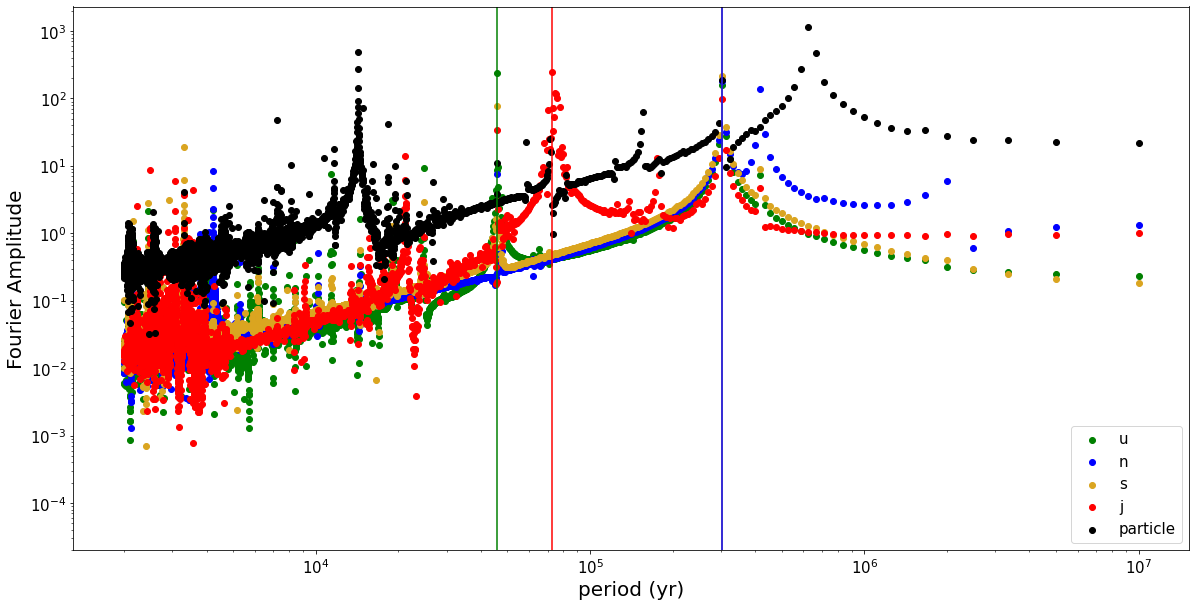

10001
10001 1154.5526713709367


NameError: name 'new_pYh' is not defined

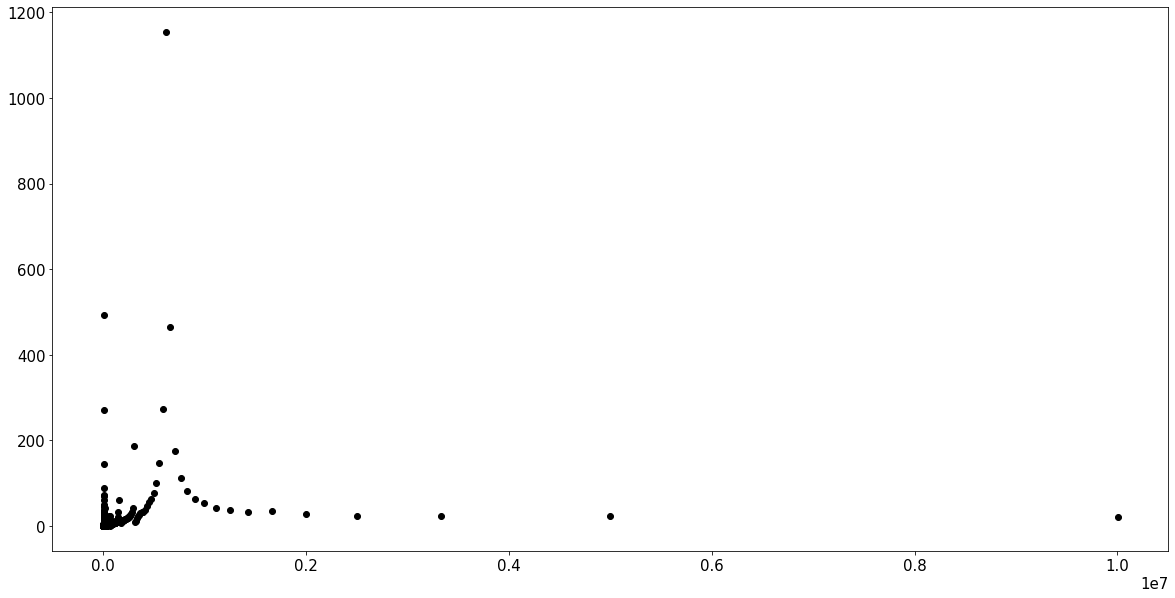

In [9]:
#plot the eccentricity spectra
import scipy
print(len(freq))
print(len(pYhu))
plt.scatter(1/freq[1:],pYhu[1:],label='u',c='g')
plt.scatter(1/freq[1:],pYhn[1:],label='n',c='b')
plt.scatter(1/freq[1:],pYhs[1:],label='s',c='goldenrod')
plt.scatter(1/freq[1:],pYhj[1:],label='j',c='r')
plt.scatter(1/freq[1:],pYh[1:],label='particle',c='k')

plt.axvline(x=1/freq[ihumax],c='g')
plt.axvline(x=1/freq[ihjmax],c='r')
plt.axvline(x=1/freq[ihsmax],c='goldenrod')
plt.axvline(x=1/freq[ihnmax],c='b')

plt.legend(loc='lower right')

plt.xlabel('period (yr)')
plt.ylabel('Fourier Amplitude')
plt.yscale('log')
plt.xscale('log')
maxp = np.max([humax,hsmax,hjmax,hnmax,pYh[1:].max()])

plt.ylim([0.00002,2*maxp]);
plt.show()

M = 200001
M = int(pYh[1:].max())
#hamming = scipy.signal.windows.hamming(M)

#hamming2 = scipy.signal.windows.hamming(len(h))
print(len(h))

pYh = np.abs(np.fft.rfft(h))


newh = h.copy()
print(len(h),pYh[1:].max())

plt.scatter(1/freq[1:],pYh[1:],label='particle',c='k')
plt.scatter(1/freq[1:],new_pYh[1:],label='particle hamm')
plt.scatter(1/freq[1:],new_pYh2[1:],label='particle hamm 2')

plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(range(len(h)-1),h[1:],label='particle',c='k')
plt.scatter(range(len(h)-1),newh[1:],label='particle hamm')
plt.scatter(range(len(h)-1),newh2[1:],label='particle hamm')

plt.show()
'''
dt=10
fs = np.linspace(1e-5,3.333e-3,2000);
times = np.arange(0,len(h),dt)
pgram = signal.lombscargle(t, h, freq[1:], normalize=False);
plt.plot(pgram)
'''

In [ ]:
#plot the inclination spectra

print(len(pYpj))
fig,ax = plt.subplots(8,figsize=(16,40))
ax[0].scatter(1/freq[1:],pYpmc[1:],label='mc',c='g')
ax[1].scatter(1/freq[1:],pYpv[1:],label='v',c='b')
ax[3].scatter(1/freq[1:],pYpe[1:],label='e',c='goldenrod')
ax[2].scatter(1/freq[1:],pYpmr[1:],label='mr',c='r')

ax[4].scatter(1/freq[1:],pYpu[1:],label='u',c='g')
ax[5].scatter(1/freq[1:],pYpn[1:],label='n',c='b')
ax[7].scatter(1/freq[1:],pYps[1:],label='s',c='goldenrod')
ax[6].scatter(1/freq[1:],pYpj[1:],label='j',c='r')
ax[0].set_title('Mercury')
ax[1].set_title('Venus')
ax[2].set_title('Earth')
ax[3].set_title('Mars')

ax[4].set_title('Uranus')
ax[5].set_title('Neptune')
ax[7].set_title('Jupiter')
ax[6].set_title('Saturn')
#plt.scatter(1/freq[1:],pYp[1:],label='particle',c='k')
fig.suptitle('inclination vector power spectra',fontsize=25)
#plt.legend(loc='lower right')


#plt.axvline(x=1/freq[ipumax],c='g')
#plt.axvline(x=1/freq[ipjmax],c='r')
#plt.axvline(x=1/freq[ipsmax],c='goldenrod')
#plt.axvline(x=1/freq[ipnmax],c='b')

#plt.xlabel('period (yr)')
#plt.ylabel('Fourier Amplitude')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xscale('log')
ax[3].set_yscale('log')
ax[3].set_xscale('log')

ax[4].set_yscale('log')
ax[4].set_xscale('log')
ax[5].set_yscale('log')
ax[5].set_xscale('log')
ax[6].set_yscale('log')
ax[6].set_xscale('log')
ax[7].set_yscale('log')
ax[7].set_xscale('log')
maxp = np.max([humax,hsmax,hjmax,hnmax,pYh[1:].max()])

plt.ylim([0.00002,2*maxp]);

try a simple filter to zero out the planet frequencies

(261.74658814707544+0j)
(196.18634682385982-155.4636663754929j)
(115.63202093714781+145.16334228150816j)
(644.3450818691663-276.36017276443215j)


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide


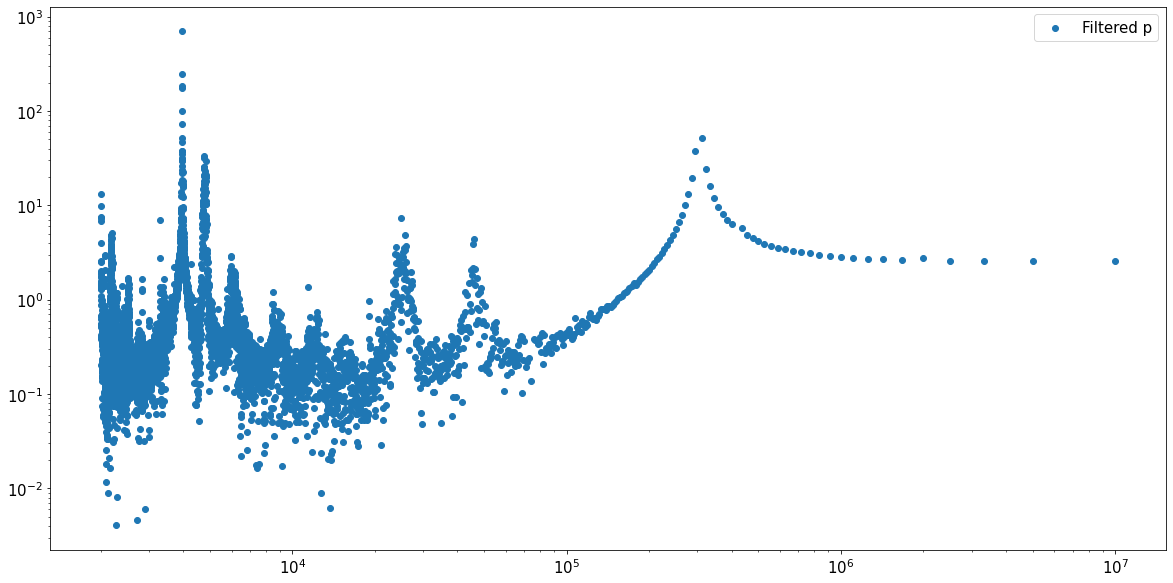

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in true_divide


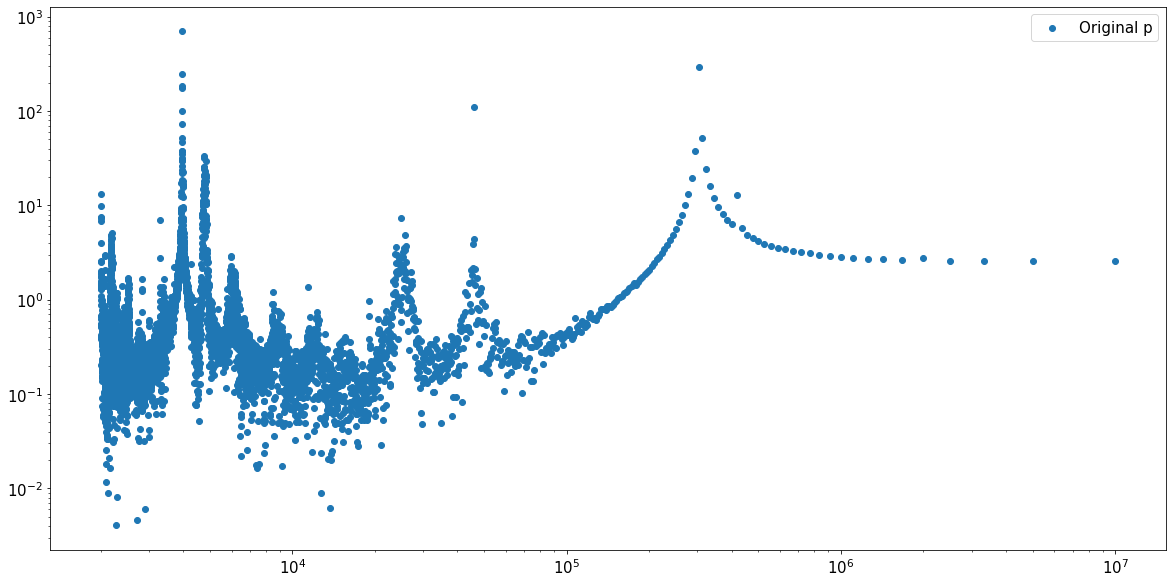

Calc: 0.05295953132698317
AstDys Sin(Inc): 0.011229
Calc: 0.1632722811674482
AstDys Ecc 0.0891079
138 352.80064865161916


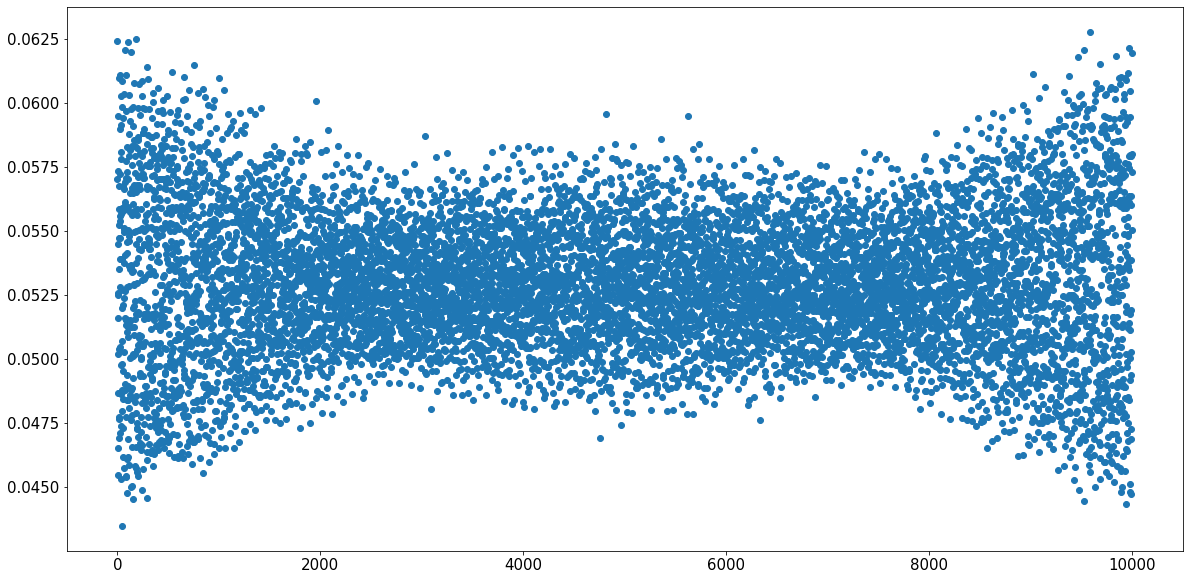

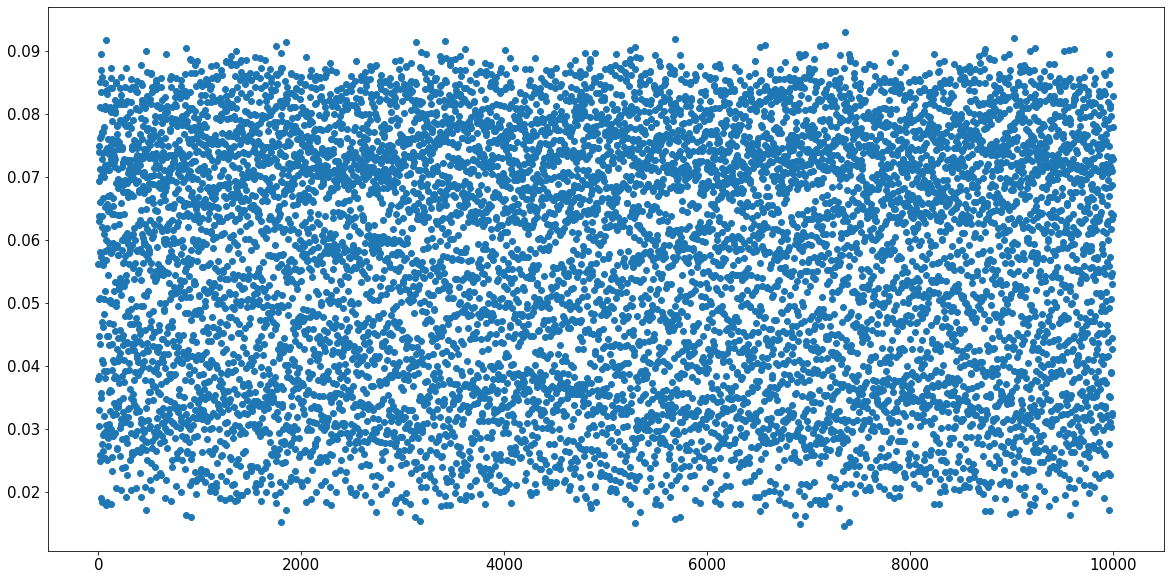

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:101: RuntimeWarning: divide by zero encountered in true_divide
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


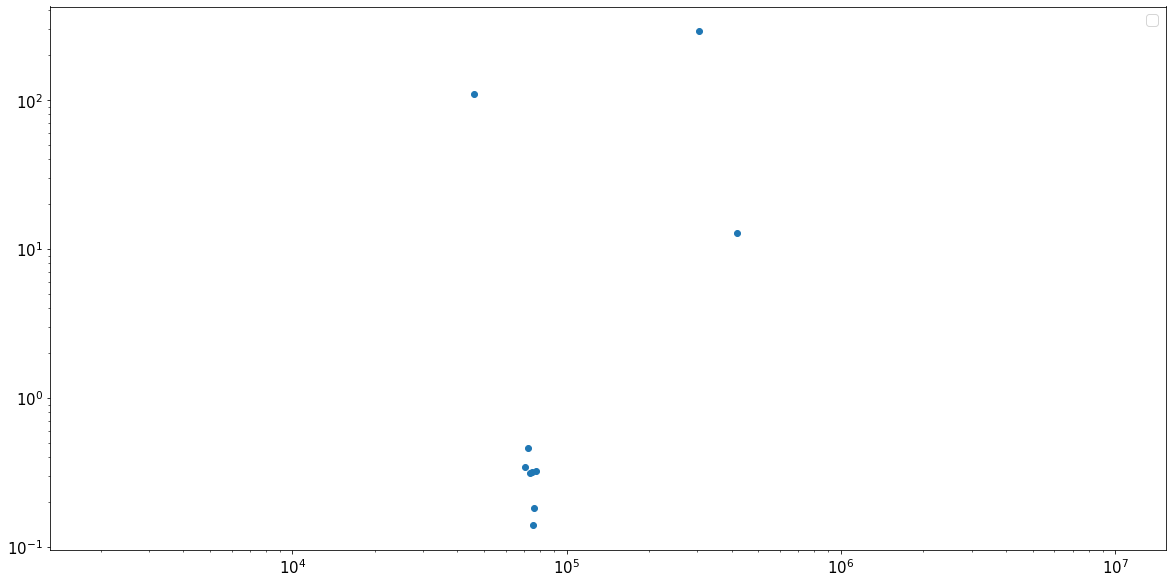

In [54]:
#make copies of the FFT outputs
Yp_f = Yp.copy()
Yq_f = Yq.copy()
Yh_f = Yh.copy()
Yk_f = Yk.copy()

print(Yp_f.max())
print(Yq_f.max())
print(Yh_f.max())
print(Yk_f.max())

imax = len(Yp)
#disregard antyhing with a period shorter than 5000 years
freqlim = 1./2000.
#disregard frequencies for which any planet has power at higher than 10% the max
pth = 0.25

spread = 1
limit_ind = np.where(freq >= freqlim)[0]

spread = 1

Yp_f[limit_ind] = 0
Yq_f[limit_ind] = 0
Yh_f[limit_ind] = 0
Yk_f[limit_ind] = 0
Yp_f[0] = 0
Yq_f[0] = 0
Yh_f[0] = 0
Yk_f[0] = 0
#'''
for i in range(0,imax-1):
    if (pYpu[i]>pth*pumax or pYpj[i]>pth*pjmax or pYps[i]>pth*psmax 
       or pYpn[i]>pth*pnmax or freq[i]>freqlim):
        Yp_f[i]=0
    if (pYqu[i]>pth*qumax or pYqj[i]>pth*qjmax or pYqs[i]>pth*qsmax 
       or pYqn[i]>pth*qnmax or freq[i]>freqlim):
        Yq_f[i]=0
    if (pYhu[i]>pth*humax or pYhj[i]>pth*hjmax or pYhs[i]>pth*hsmax 
       or pYhn[i]>pth*hnmax or freq[i]>freqlim):
        Yh_f[i]=0
    if (pYku[i]>pth*kumax or pYkj[i]>pth*kjmax or pYks[i]>pth*ksmax 
       or pYkn[i]>pth*knmax or freq[i]>freqlim):
        Yk_f[i]=0
'''        
for i in range(0,imax-1):
    if freq[i]>freqlim:
        Yp_f[i]=0
    if freq[i]>freqlim:
        Yq_f[i]=0
    if freq[i]>freqlim:
        Yh_f[i]=0
    if freq[i]>freqlim:
        Yk_f[i]=0
'''

    
p_f = np.fft.irfft(Yp_f,len(p))
q_f = np.fft.irfft(Yq_f,len(q))
h_f = np.fft.irfft(Yh_f,len(h))
k_f = np.fft.irfft(Yk_f,len(k))

plt.scatter(1/freq,np.abs(Yk_f),label='Filtered p')
#plt.scatter(1/freq,test)
plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.show()
plt.scatter(1/freq,np.abs(np.fft.rfft(k)),label='Original p')
plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.show()

sini = np.sqrt(p*p+q*q)
sini_f = np.sqrt(p_f*p_f + q_f*q_f)
ecc = np.sqrt(h*h+k*k)
ecc_f = np.sqrt(h_f*h_f + k_f*k_f)

print('Calc:',np.mean(sini_f))
print('AstDys Sin(Inc):',0.0112290)
#print('AstDys 2004KF19', 0.0344540)
print('Calc:',np.mean(ecc_f))
print('AstDys Ecc', 0.0891079)
#print('AstDys 2004KF19:', 0.0578858)

print(ihjmax,pjmax)



Yk_1 = np.abs(Yk_f)
Yh_1 = np.abs(Yh_f)
Yp_1 = np.abs(Yp_f)
Yq_1 = np.abs(Yq_f)
plt.scatter(range(len(sini)),sini_f)
plt.show()

plt.scatter(range(len(sini)),sini)
plt.show()

plt.scatter(1/freq,abs(Yk_1-np.abs(Yk.copy())))
plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.show()

# Secular Theory

In [66]:
#set up all the FFT power spectra, etc
from bin_to_df import bin_to_df
import rebound
#the outputs are not exact, but it's about 
#sbody = '2004PY107'
#objname = '2004 PY107'
sbody = '2'
sbody = '174'
#sbody = '367'
objname = sbody

#sbody = '2004KF19'
#objname = '2004KF19'
#path = 'Asteroids/'+objname
path = 'Sims/AstFam_families/'+objname
astdys = pd.read_csv('data_files/AstFam_families_data.csv')

fullfile = 'Sims/AstFam_families/'+sbody+'/archive_hires.bin'
print(fullfile)
arc1 = rebound.SimulationArchive(fullfile)
series = bin_to_df('AstFam_families',sbody,arc1,astdys,'8planet')

print(series)
series=series[int(len(series)/10*1):int(len(series)/10*3)]

#archive = rebound.SimulationArchive(path+'/archive.bin')
#series = bin_to_df.bin_to_df(objname,archive)
t = series['t'].values
t = t-t[0]
dt=int(t[1])
a = series['a'].values
e = series['ecc'].values
inc = series['inc'].values
#omega = series['omega'].values
#Omega = series['Omega'].values
#M = series['M'].values
h = series['h'].values
k = series['k'].values
p = series['p'].values
q = series['q'].values
hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values
hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values
hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values
hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

dt = int(t[1])
n = int(len(h))
freq = np.fft.rfftfreq(n,d=dt)

#particle eccentricity vectors
Yh= np.fft.rfft(h)
Yk = np.fft.rfft(k)

#giant planets
Yhu = np.fft.rfft(hu)
Yhj = np.fft.rfft(hj)
Yhn = np.fft.rfft(hn)
Yhs = np.fft.rfft(hs)
Yku = np.fft.rfft(ku)
Ykj = np.fft.rfft(kj)
Ykn = np.fft.rfft(kn)
Yks = np.fft.rfft(ks)

#particle inclination vectors
Yp= np.fft.rfft(p)
Yq = np.fft.rfft(q)
#giant planets
Ypu = np.fft.rfft(pu)
Ypj = np.fft.rfft(pj)
Ypn = np.fft.rfft(pn)
Yps = np.fft.rfft(ps)
Yqu = np.fft.rfft(qu)
Yqj = np.fft.rfft(qj)
Yqn = np.fft.rfft(qn)
Yqs = np.fft.rfft(qs)

ihmax = np.argmax(np.abs(Yh[1:]))+1
#if 1/freq[ihmax] > 1e5:
#    Yh[ihmax-1:ihmax+1] = 0
ihmax = np.argmax(np.abs(Yh[1:]))+1
ipmax = np.argmax(np.abs(Yp[1:]))+1
ihumax = np.argmax(np.abs(Yhu[1:]))+1
ihnmax = np.argmax(np.abs(Yhn[1:]))+1 
ihsmax = np.argmax(np.abs(Yhs[1:]))+1 
ihjmax = np.argmax(np.abs(Yhj[1:]))+1 
ikumax = np.argmax(np.abs(Yku[1:]))+1 
iknmax = np.argmax(np.abs(Ykn[1:]))+1
iksmax = np.argmax(np.abs(Yks[1:]))+1
ikjmax = np.argmax(np.abs(Ykj[1:]))+1 
ipumax = np.argmax(np.abs(Yhu[1:]))+1
ipnmax = np.argmax(np.abs(Yhn[1:]))+1 
ipsmax = np.argmax(np.abs(Yhs[1:]))+1 
ipjmax = np.argmax(np.abs(Yhj[1:]))+1 
iqumax = np.argmax(np.abs(Yku[1:]))+1 
iqnmax = np.argmax(np.abs(Ykn[1:]))+1
iqsmax = np.argmax(np.abs(Yks[1:]))+1
iqjmax = np.argmax(np.abs(Ykj[1:]))+1 

Sims/AstFam_families/174/archive_hires.bin


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


                  t         a       ecc         an      eccn        inc  \
0      0.000000e+00  3.175913  0.163967  30.067732  0.008672  22.601144   
1      1.000008e+03  3.178843  0.200715  30.069516  0.009505  22.108089   
2      2.000004e+03  3.180641  0.224430  30.061209  0.009204  21.573182   
3      3.000012e+03  3.194101  0.212890  30.055577  0.008713  22.421027   
4      4.000008e+03  3.192674  0.171239  30.063521  0.008629  23.891539   
...             ...       ...       ...        ...       ...        ...   
9996   9.996000e+06  3.167080  0.148768  30.066204  0.007600  21.318706   
9997   9.997000e+06  3.197550  0.133906  30.055535  0.008016  21.024601   
9998   9.998000e+06  3.157353  0.209819  30.059063  0.008310  19.676576   
9999   9.999000e+06  3.169555  0.209836  30.069163  0.007921  19.729644   
10000  1.000000e+07  3.174149  0.148801  30.068278  0.006987  21.600806   

              p         q         h         k  ...    x    y    z   vx   vy  \
0     -0.135448 -0.3

In [67]:
#Secular Resonances

rev = 1296000
g = freq[ihmax]
s = freq[ipmax]

g5 = freq[ihjmax]
g6 = freq[ihsmax]
g7 = freq[ihumax]
g8 = freq[ihnmax]
s5 = 0
s6 = freq[ipsmax]
s7 = freq[ipumax]
s8 = freq[ipnmax]

z1 = abs(g+s-g6-s6)
z2 = abs(g+s-g5-s7)
z3 = abs(g+s-g5-s6)
z4 = abs(g-2*g6+g5)
z5 = abs(g-2*g6+g7)
z6 = abs(s-s6-g5+g6)
z7 = abs(g-3*g6+2*g5)
z8 = abs(2*(g-g6)+s-s6)
z9 = abs(3*(g-g6)+s-s6)

#print(1/g5,1/g6,1/g7,1/g8)
#print(1/s6,1/s7,1/s8)
#print(1/g,1/z1,1/z2,1/z3,1/z4)
#print(1/s,1/z5,1/z6,1/z7,1/z8,1/z9,1/z10,1/z11,1/z12)
#'''
g5 = 4.24/rev
g6 = 28.22/rev
g7 = 3.08/rev
g8 = 0.67/rev
s6 = 26.34/rev
s7 = 2.99/rev
s8 = 0.69/rev
z1 = abs(g+s-g6-s6)
z2 = abs(g+s-g5-s7)
z3 = abs(g+s-g5-s6)
z4 = abs(g-2*g6+g5)
z5 = abs(g-2*g6+g7)
z6 = abs(s-s6-g5+g6)
z7 = abs(g-3*g6+2*g5)
z8 = abs(2*(g-g6)+s-s6)
z9 = abs(3*(g-g6)+s-s6)

z1_g = (-s+g6+s6)
z2_g = (-s+g5+s7)
z3_g = (-s+g5+s6)
z4_g = (2*g6-g5)
z5_g = (2*g6-g7)
z7_g = (3*g6-2*g5)
z8_g = (2*g6-s+s6)/2
z9_g = (3*g6-s+s6)/3
    
    
z1_s = (-g+g6+s6)
z2_s = (-g+g5+s7)
z3_s = (-g+g5+s6)
z6_s = (s6+g5-g6)
z8_s = (-2*(g-g6)+s6)
z9_s = (-3*(g-g6)+s6)
#'''
print(1/g,1/s)
print(1/g5,1/g6,1/g7,1/g8)
print(1/s6,1/s7,1/s8)
print(1/z1,1/z2,1/z3,1/z4)
#print(1/s,1/z5,1/z6,1/z7,1/z8,1/z9,1/z10,1/z11,1/z12)
#14266.76176890157 27857.938718662954
#305660.37735849054 45924.87597448618 420779.2207792208 1934328.358208955
#49202.73348519362 433444.81605351163 1878260.8695652175
#14285.714285714286 4821.572070597339 4099.6830337654455 4426.652821991174 33644.85981308412

17373.91304347826 16932.20338983051
305660.37735849054 45924.87597448618 420779.2207792208 1934328.358208955
49202.73348519362 433444.81605351163 1878260.8695652175
13419.60327766086 9005.932962593602 10750.267904782831 57871.10789283129


7
7 285428.5714285715
44 45409.09090909091
5 399600.0
2 999000.0000000001
149 13409.395973154364
222 9000.0
186 10741.935483870968
35 57085.71428571429
33 60545.45454545455
3 666000.0000000001
221 9040.723981900454
292 6842.465753424657
gind= 118


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide


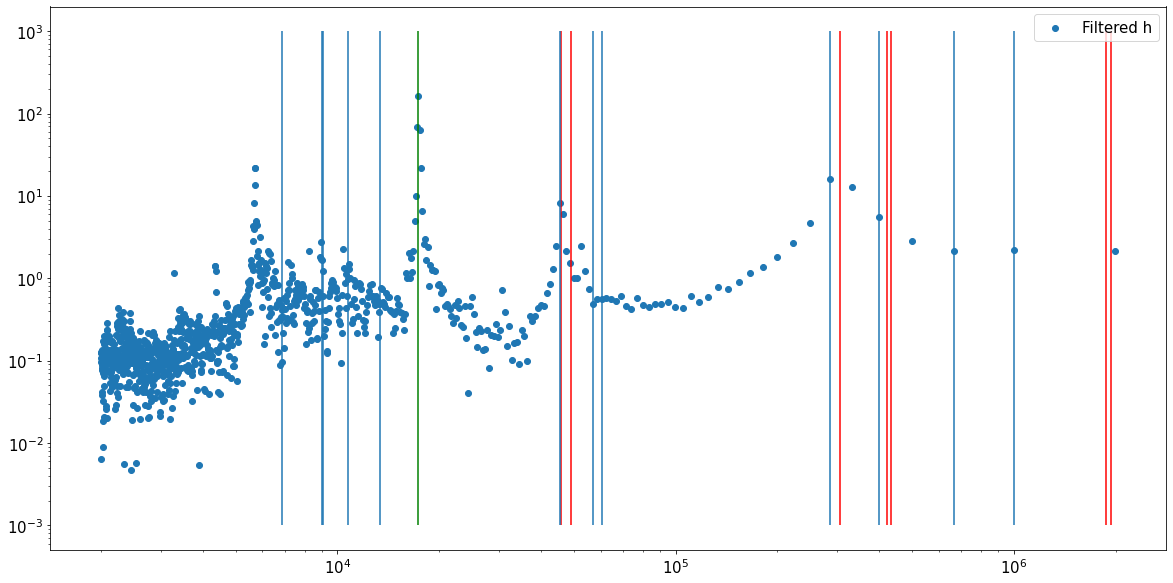

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: divide by zero encountered in true_divide


41 48731.707317073175
5 399600.0
2 999000.0000000001
149 13409.395973154364
222 9000.0
186 10741.935483870968
115 17373.91304347826
sind= 118


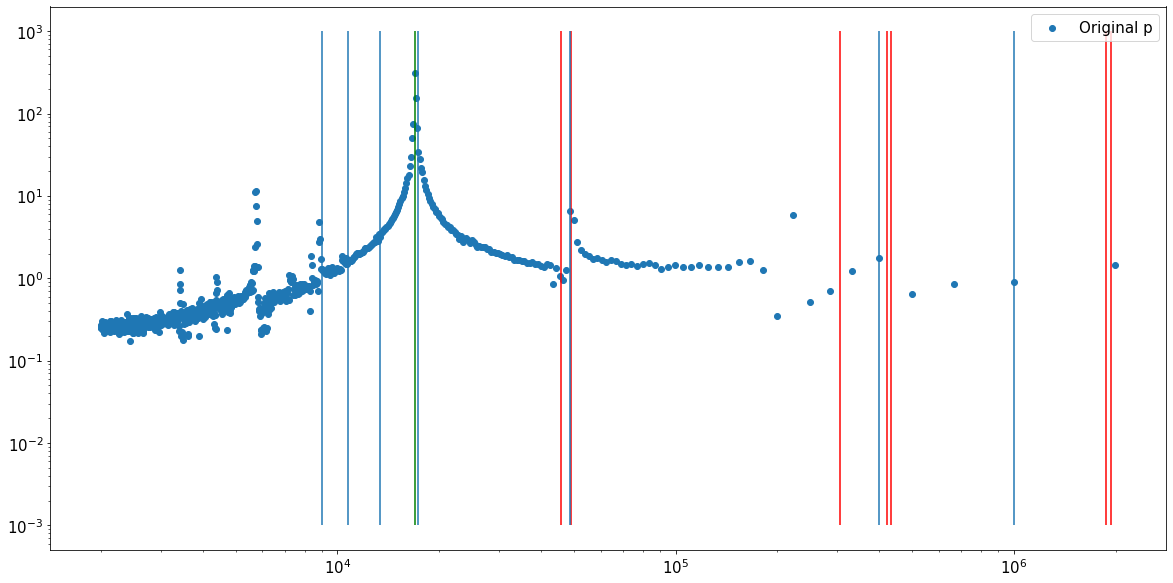

Calc: 0.36038903372924436
AstDys Sin(Inc): 0.3737393
Calc: 0.19204920702557263
AstDys Ecc 0.1946358


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:181: ComplexWarning: Casting complex values to real discards the imaginary part


NameError: name 'iqmax' is not defined

In [72]:
#make copies of the FFT outputs
Yp_f = Yp.copy()
Yq_f = Yq.copy()
Yh_f = Yh.copy()
Yk_f = Yk.copy()

#z10,z11,s7,z6

Yp_f[0]=0
Yq_f[0]=0
Yh_f[0]=0
Yk_f[0]=0

print(np.where(freq>=g5)[0][0])

#secresind = [np.where(freq >= g5)[0][0],np.where(freq >= g6)[0][0],np.where(freq >= g7)[0][0],np.where(freq >= g8)[0][0],np.where(freq >= s6)[0][0],np.where(freq >= s7)[0][0],np.where(freq >= s8)[0][0],np.where(freq >= z1)[0][0],np.where(freq >= z2)[0][0],np.where(freq >= z3)[0][0],np.where(freq >= z4)[0][0],np.where(freq >= z5)[0][0],np.where(freq >= z6)[0][0],np.where(freq >= z7)[0][0],np.where(freq >= z8)[0][0],np.where(freq >= z9)[0][0]]

#Identical to above method
#secresind1 = [np.where(freq <= g5)[0][0],np.where(freq >= g6)[0][0],np.where(freq >= g7)[0][0],np.where(freq >= g8)[0][0],np.where(freq >= z1)[0][0],np.where(freq >= z4)[0][0],np.where(freq >= z5)[0][0],np.where(freq >= z7)[0][0],np.where(freq >= z8)[0][0],np.where(freq >= z9)[0][0]]
#secresind2 = [np.where(freq >= s6)[0][0],np.where(freq >= s7)[0][0],np.where(freq >= s8)[0][0],np.where(freq >= z1)[0][0],np.where(freq >= z4)[0][0],np.where(freq >= z5)[0][0],np.where(freq >= z7)[0][0],np.where(freq >= z8)[0][0],np.where(freq >= z9)[0][0]]

#Include all linear coupled frequencies
#secresind1 = [np.where(freq >= g5)[0][0],np.where(freq >= g6)[0][0],np.where(freq >= g7)[0][0],np.where(freq >= g8)[0][0],np.where(freq >= s6)[0][0],np.where(freq >= s7)[0][0],np.where(freq >= s8)[0][0],np.where(freq >= z1)[0][0],np.where(freq >= z2)[0][0],np.where(freq >= z3)[0][0],np.where(freq >= z4)[0][0],np.where(freq >= z5)[0][0],np.where(freq >= z6)[0][0],np.where(freq >= z7)[0][0],np.where(freq >= z8)[0][0],np.where(freq >= z9)[0][0],np.where(freq >= z10)[0][0],np.where(freq >= z11)[0][0],np.where(freq >= z12)[0][0]]
#secresind2 = [np.where(freq >= g5)[0][0],np.where(freq >= g6)[0][0],np.where(freq >= g7)[0][0],np.where(freq >= g8)[0][0],np.where(freq >= s6)[0][0],np.where(freq >= s7)[0][0],np.where(freq >= s8)[0][0],np.where(freq >= z1)[0][0],np.where(freq >= z2)[0][0],np.where(freq >= z3)[0][0],np.where(freq >= z4)[0][0],np.where(freq >= z5)[0][0],np.where(freq >= z6)[0][0],np.where(freq >= z7)[0][0],np.where(freq >= z8)[0][0],np.where(freq >= z9)[0][0],np.where(freq >= z10)[0][0],np.where(freq >= z11)[0][0],np.where(freq >= z12)[0][0]]

#Include Actual Milanai and Knezevic
secresind1 = [np.where(freq >= g5)[0][0],np.where(freq >= g6)[0][0],np.where(freq >= g7)[0][0],np.where(freq >= g8)[0][0],np.where(freq >= z1)[0][0],np.where(freq >= z2)[0][0],np.where(freq >= z3)[0][0],np.where(freq >= z4)[0][0],np.where(freq >= z5)[0][0],np.where(freq >= z7)[0][0],np.where(freq >= z8)[0][0],np.where(freq >= z9)[0][0]]
secresind2 = [np.where(freq >= s6)[0][0],np.where(freq >= s7)[0][0],np.where(freq >= s8)[0][0],np.where(freq >= z1)[0][0],np.where(freq >= z2)[0][0],np.where(freq >= z3)[0][0],np.where(freq >= z6)[0][0],np.where(freq >= z8)[0][0],np.where(freq >= z9)[0][0]]


#Include all g and s secular frequencies
#secresind1 = [np.where(freq >= g5)[0][0],np.where(freq >= g6)[0][0],np.where(freq >= g7)[0][0],np.where(freq >= g8)[0][0],np.where(freq >= s6)[0][0],np.where(freq >= s7)[0][0],np.where(freq >= s8)[0][0]]
#secresind2 = [np.where(freq >= g5)[0][0],np.where(freq >= g6)[0][0],np.where(freq >= g7)[0][0],np.where(freq >= g8)[0][0],np.where(freq >= s6)[0][0],np.where(freq >= s7)[0][0],np.where(freq >= s8)[0][0]]

#Specific g and s frequencies
#secresind1 = [np.where(freq >= g5)[0][0],np.where(freq >= g6)[0][0],np.where(freq >= g7)[0][0],np.where(freq >= g8)[0][0]]
#secresind2 = [np.where(freq >= s6)[0][0],np.where(freq >= s7)[0][0],np.where(freq >= s8)[0][0]]

#freq1 = [g5,g6,g7,g8,z1,z2,z3,z4,z5,z7,z8,z9]
#freq2 = [s6,s7,s8,z1,z2,z3,z6,z8,z9]
#Knezevic and Milani frequencies
#secresind1 = [np.where(freq >= g5)[0][0],np.where(freq >= g6)[0][0],np.where(freq >= g7)[0][0],np.where(freq >= g8)[0][0],np.where(freq >= z4)[0][0]]
#secresind2 = [np.where(freq >= s6)[0][0],np.where(freq >= s7)[0][0],np.where(freq >= s8)[0][0],np.where(freq >= z4)[0][0]]

#Knezevic and Milani frequencies
#secresind1 = [np.where(freq >= g5)[0][0],np.where(freq >= g6)[0][0],np.where(freq >= g7)[0][0],np.where(freq >= g8)[0][0],np.where(freq >= z1_g)[0][0],np.where(freq >= z2_g)[0][0],np.where(freq >= z3_g)[0][0],np.where(freq >= z4_g)[0][0],np.where(freq >= z5_g)[0][0],np.where(freq >= z7_g)[0][0],np.where(freq >= z8_g)[0][0],np.where(freq >= z9_g)[0][0]]
#secresind2 = [np.where(freq >= s6)[0][0],np.where(freq >= s7)[0][0],np.where(freq >= s8)[0][0],np.where(freq >= z1_s)[0][0],np.where(freq >= z2_s)[0][0],np.where(freq >= z3_s)[0][0],np.where(freq >= z6_s)[0][0],np.where(freq >= z8_s)[0][0],np.where(freq >= z9_s)[0][0]]

imax = len(Yp)
#disregard antyhing with a period shorter than 5000 years
freqlim = 1./2000.
#disregard frequencies for which any planet has power at higher than 10% the max
pth = 0.25

limit_ind = np.where(freq >= freqlim)[0]

spread = 2

gind = np.where(freq >= g)[0][0]
sind = np.where(freq >= s)[0][0]
#print(1/secresind1,1/secresind2)
for i in range(len(secresind1)):
    if secresind1[i] == gind:
        continue
    if abs(secresind1[i] - gind) < 3:
        continue
    if spread > 0:
        Yh_f[secresind1[i]-spread:secresind1[i]+spread] = 0
        Yk_f[secresind1[i]-spread:secresind1[i]+spread] = 0
    else:
        Yh_f[secresind1[i]] = 0
        Yk_f[secresind1[i]] = 0
        
for i in range(len(secresind2)):
    if secresind2[i] == sind:
        continue
    if abs(secresind2[i] - sind) < 3:
        continue
    if spread > 0:
        Yp_f[secresind2[i]-spread:secresind2[i]+spread] = 0
        Yq_f[secresind2[i]-spread:secresind2[i]+spread] = 0
    else:
        Yp_f[secresind2[i]] = 0
        Yq_f[secresind2[i]] = 0

Yp_f[limit_ind] = 0
Yq_f[limit_ind] = 0
Yk_f[limit_ind] = 0
Yh_f[limit_ind] = 0

p_f = np.fft.irfft(Yp_f,len(p))
q_f = np.fft.irfft(Yq_f,len(q))
h_f = np.fft.irfft(Yh_f,len(h))
k_f = np.fft.irfft(Yk_f,len(k))


plt.scatter(1/freq,np.abs(np.fft.rfft(h)),label='Filtered h')
plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.vlines(1/g5,ymin=1e-3,ymax=1e3,colors='r')
plt.vlines(1/g6,ymin=1e-3,ymax=1e3,colors='r')
plt.vlines(1/g7,ymin=1e-3,ymax=1e3,colors='r')
plt.vlines(1/g8,ymin=1e-3,ymax=1e3,colors='r')

plt.vlines(1/s6,ymin=1e-3,ymax=1e3,colors='r')
plt.vlines(1/s7,ymin=1e-3,ymax=1e3,colors='r')
plt.vlines(1/s8,ymin=1e-3,ymax=1e3,colors='r')


for i in range(len(secresind1)):
    plt.vlines(1/freq[secresind1[i]],ymin=1e-3,ymax=1e3)
    print(secresind1[i], 1/freq[secresind1[i]])
print('gind=',np.where(freq >= s)[0][0])
    
plt.vlines(1/g,ymin=1e-3,ymax=1e3,colors='g')

'''
plt.vlines(1/z1,ymin=1e-3,ymax=1e3)
plt.vlines(1/z2,ymin=1e-3,ymax=1e3)
plt.vlines(1/z3,ymin=1e-3,ymax=1e3)
plt.vlines(1/z4,ymin=1e-3,ymax=1e3)
plt.vlines(1/z5,ymin=1e-3,ymax=1e3)
plt.vlines(1/z6,ymin=1e-3,ymax=1e3)
plt.vlines(1/z7,ymin=1e-3,ymax=1e3)
plt.vlines(1/z8,ymin=1e-3,ymax=1e3)
plt.vlines(1/z9,ymin=1e-3,ymax=1e3)
'''
plt.show()
plt.scatter(1/freq,np.abs(np.fft.rfft(p)),label='Original p')
plt.xscale('log')
plt.legend()
plt.yscale('log')

plt.vlines(1/g5,ymin=1e-3,ymax=1e3,colors='r')
plt.vlines(1/g6,ymin=1e-3,ymax=1e3,colors='r')
plt.vlines(1/g7,ymin=1e-3,ymax=1e3,colors='r')
plt.vlines(1/g8,ymin=1e-3,ymax=1e3,colors='r')

plt.vlines(1/s6,ymin=1e-3,ymax=1e3,colors='r')
plt.vlines(1/s7,ymin=1e-3,ymax=1e3,colors='r')
plt.vlines(1/s8,ymin=1e-3,ymax=1e3,colors='r')

for i in range(len(secresind2)-2):
    plt.vlines(1/freq[secresind2[i]],ymin=1e-3,ymax=1e3)
    print(secresind2[i],1/freq[secresind2[i]])
print('sind=',np.where(freq >= s)[0][0])
'''
plt.vlines(1/z1,ymin=1e-3,ymax=1e3)
plt.vlines(1/z2,ymin=1e-3,ymax=1e3)
plt.vlines(1/z3,ymin=1e-3,ymax=1e3)
plt.vlines(1/z4,ymin=1e-3,ymax=1e3)
plt.vlines(1/z5,ymin=1e-3,ymax=1e3)
plt.vlines(1/z6,ymin=1e-3,ymax=1e3)
plt.vlines(1/z7,ymin=1e-3,ymax=1e3)
plt.vlines(1/z8,ymin=1e-3,ymax=1e3)
plt.vlines(1/z9,ymin=1e-3,ymax=1e3)
'''

plt.vlines(1/s,ymin=1e-3,ymax=1e3,colors='g')
plt.show()

sini = np.sqrt(p*p+q*q)
sini_f = np.sqrt(p_f*p_f + q_f*q_f)
ecc = np.sqrt(h*h+k*k)
ecc_f = np.sqrt(h_f*h_f + k_f*k_f)

astdys = pd.read_csv('data_files/AstFam_data.csv')
print('Calc:',np.mean(sini_f))
#print('AstDys Sin(Inc):',0.0112290)
print('AstDys Sin(Inc):',astdys['sinI'].iloc[int(sbody)])
print('Calc:',np.mean(ecc_f))
#print('AstDys Ecc', 0.0891079)
print('AstDys Ecc', astdys['e'].iloc[int(sbody)])

Yp_copy = np.zeros(len(Yp_f))
Yq_copy = np.zeros(len(Yp_f))
Yh_copy = np.zeros(len(Yp_f))
Yk_copy = np.zeros(len(Yp_f))

Yp_copy[ipmax] = Yp_f[ipmax]
Yq_copy[iqmax] = Yq_f[iqmax]
Yh_copy[ihmax] = Yh_f[ihmax]
Yk_copy[ikmax] = Yk_f[ikmax]

spread = 100
Yp_copy[ipmax-spread:ipmax+spread] = Yp_f[ipmax-spread:ipmax+spread]
Yq_copy[ipmax-spread:ipmax+spread] = Yq_f[ipmax-spread:ipmax+spread]
Yh_copy[ikmax-spread:ikmax+spread] = Yp_f[ikmax-spread:ikmax+spread]
Yk_copy[ikmax-spread:ikmax+spread] = Yp_f[ikmax-spread:ikmax+spread]
#Yq_copy[iqmax] = Yq_f[iqmax]
#Yh_copy[ihmax] = Yh_f[ihmax]
#Yk_copy[ikmax] = Yk_f[ikmax]

p_f = np.fft.irfft(Yp_copy,len(p))
q_f = np.fft.irfft(Yq_copy,len(q))
h_f = np.fft.irfft(Yh_copy,len(h))
k_f = np.fft.irfft(Yk_copy,len(k))

sini = np.sqrt(p*p+q*q)
sini_f = np.sqrt(p_f*p_f + q_f*q_f)
ecc = np.sqrt(h*h+k*k)
ecc_f = np.sqrt(h_f*h_f + k_f*k_f)


print('Calc sini:', np.mean(sini))
print('Calc ecc', np.mean(ecc))
#print('Calc:',np.max(sini_f))
#print('AstDys Sin(Inc):',0.0112290)
print('AstDys Sin(Inc):',astdys['sinI'].iloc[int(sbody)])
#print('Calc:',np.max(ecc_f))
#print('AstDys Ecc', 0.0891079)
print('AstDys Ecc', astdys['e'].iloc[int(sbody)])

print('0.0891035 0.2179816')
plt.plot(sini_f)
plt.show()
plt.plot(ecc_f)
plt.show()

'''
Calc sini: 0.5451764001756175
Calc ecc 0.2786146688863796
AstDys Sin(Inc): 0.5471763
AstDys Ecc 0.2808809

Calc sini: 0.5452944571323981
Calc ecc 0.27887961164204467

Calc sini: 0.5451025895726601
Calc ecc 0.27823214927697404
'''

In [ ]:
#make copies of the FFT outputs
Yp_f = Yp.copy()
Yq_f = Yq.copy()
Yh_f = Yh.copy()
Yk_f = Yk.copy()

#z10,z11,s7,z6

Yp_f[0]=0
Yq_f[0]=0
Yh_f[0]=0
Yk_f[0]=0

Yp_sin = np.zeros(len(Yp_f),dtype=np.complex_)
Yq_sin = np.zeros(len(Yq_f),dtype=np.complex_)
Yh_sin = np.zeros(len(Yh_f),dtype=np.complex_)
Yk_sin = np.zeros(len(Yk_f),dtype=np.complex_)

gind1 = np.argmax(np.abs(Yh_f))
gind2 = np.argmax(np.abs(Yk_f))
sind1 = np.argmax(np.abs(Yp_f))
sind2 = np.argmax(np.abs(Yq_f))

#Yp_f[sind1]=0
#Yq_f[sind2]=0
#Yh_f[gind1]=0
#Yk_f[gind2]=0

gind1 = np.argmax(np.abs(Yh_f))
gind2 = np.argmax(np.abs(Yk_f))
sind1 = np.argmax(np.abs(Yp_f))
sind2 = np.argmax(np.abs(Yq_f))

print(gind1,sind1)
print(np.abs(Yh_f[gind1]),np.abs(Yp_f[sind1]))
print(np.max(np.abs(Yh_f)),np.max(np.abs(Yp_f)))
Yp_sin[sind1] = Yp_f[sind1]
Yq_sin[sind2] = Yq_f[sind2]
Yh_sin[gind1] = Yh_f[gind1]
Yk_sin[gind2] = Yk_f[gind2]
p_sin = np.fft.irfft(Yp_sin,len(p))
q_sin = np.fft.irfft(Yq_sin,len(q))
h_sin = np.fft.irfft(Yh_sin,len(h))
k_sin = np.fft.irfft(Yk_sin,len(k))
sini_sin = np.sqrt(p_sin**2+q_sin**2)
ecc_sin = np.sqrt(h_sin**2+k_sin**2)

plt.scatter(1/freq,np.abs(Yq_f))
plt.scatter(1/freq,np.abs(Yq_sin),c='r')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.scatter(1/freq,np.abs(Yp_f))
plt.scatter(1/freq,np.abs(Yp_sin),c='r')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.scatter(1/freq,np.abs(Yh_f))
plt.scatter(1/freq,np.abs(Yh_sin),c='r')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.scatter(1/freq,np.abs(Yk_f))
plt.scatter(1/freq,np.abs(Yk_sin),c='r')
plt.xscale('log')
plt.yscale('log')
plt.show()

print('sinI: ', np.max(sini_sin))
print('ecc: ', np.max(ecc_sin))
#print('AstDys Sin(Inc):',0.0112290)
#print('AstDys Ecc', 0.0891079)
print('AstDys Sin(Inc):',astdys['sinI'].iloc[1])
print('AstDys Ecc', astdys['e'].iloc[1])

print(Yp_f[sind1])
print(Yp_sin[sind1])
print(np.argmax(np.abs(Yp_f)))
print(np.argmax(np.abs(Yp_sin)))
print(dt)

plt.plot(ecc)
plt.show()

2 2
1749.1126350713068 258.99368310915116
1749.1126350713068 258.99368310915116


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide


In [411]:
diffsk = np.abs(Yk_f)-Yk_1
diffindk = (np.where(diffsk != 0)[0])
print(len(diffindk))
print(1/freq[diffindk])
print(diffindk)

plt.scatter(1/freq,np.abs(Yk_f),label='Filtered k')
plt.scatter(1/freq[diffindk],np.abs(Yk_f[diffindk]),label='Diff',c='r')
plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.show()

diffsh = np.abs(Yh_f)-Yh_1
diffindh = (np.where(diffsh != 0)[0])
print(len(diffindh))
print(1/freq[diffindh])

plt.scatter(1/freq,np.abs(Yh_1),label='Filtered h')
plt.scatter(1/freq[diffindh],np.abs(Yh_1[diffindh]),label='Diff',c='r')
plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.show()


print(Yh_1[0],np.abs(Yh_f[0]))
print(Yh_1[0]-np.abs(Yh_f[0]))
print(1/freq[0])

ValueError: operands could not be broadcast together with shapes (5001,) (50001,) 

0
[array([], dtype=int64)]


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


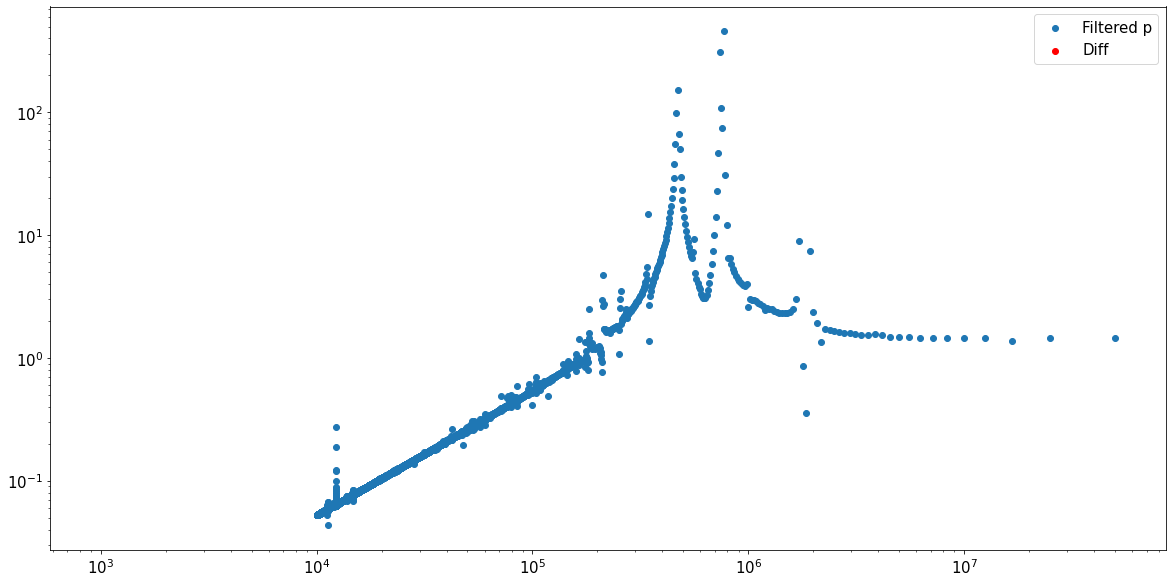

0
[]


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


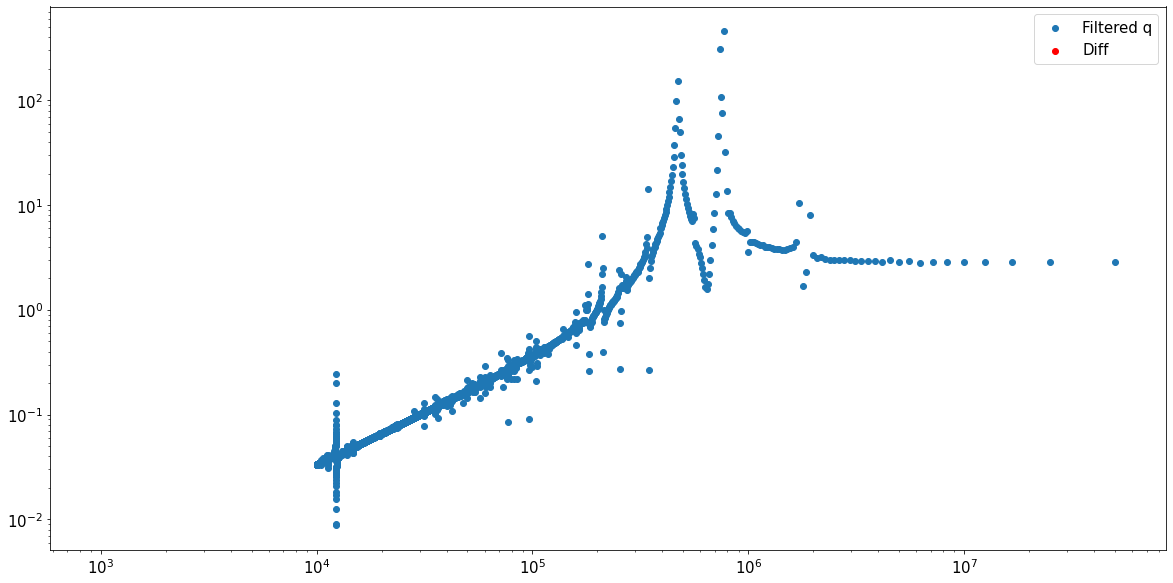

0.0 0.0
0.0
inf


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [302]:
diffsp = np.abs(Yp_f)-Yp_1
diffindp = (np.where(diffsp != 0)[0])
print(len(diffindp))
print([diffindp])

plt.scatter(1/freq,np.abs(Yp_1),label='Filtered p')
plt.scatter(1/freq[diffindp],np.abs(Yp_1[diffindp]),label='Diff',c='r')
plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.show()

diffsq = np.abs(Yq_f)-Yq_1
diffindq = (np.where(diffsq != 0)[0])
print(len(diffindq))
print(1/freq[diffindq])

plt.scatter(1/freq,np.abs(Yq_1),label='Filtered q')
plt.scatter(1/freq[diffindq],np.abs(Yq_1[diffindq]),label='Diff',c='r')
plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.show()

print(Yp_1[0],np.abs(Yp_f[0]))
print(Yp_1[0]-np.abs(Yp_f[0]))
print(1/freq[0])

(1312.9196311804067+0j)
(208.64992793323617+0.00698153946982649j)
(130.9046635564327-1299.1086014206257j)
(1299.1020245063723+130.9024411852074j)
107 107 65 65


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


50001
50001


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide


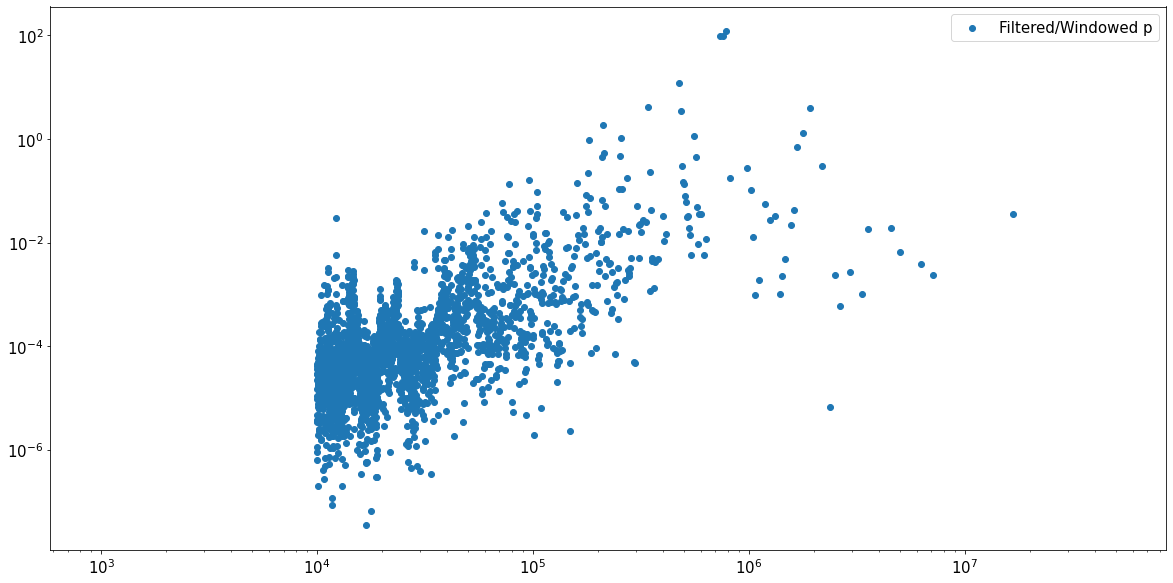

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in true_divide


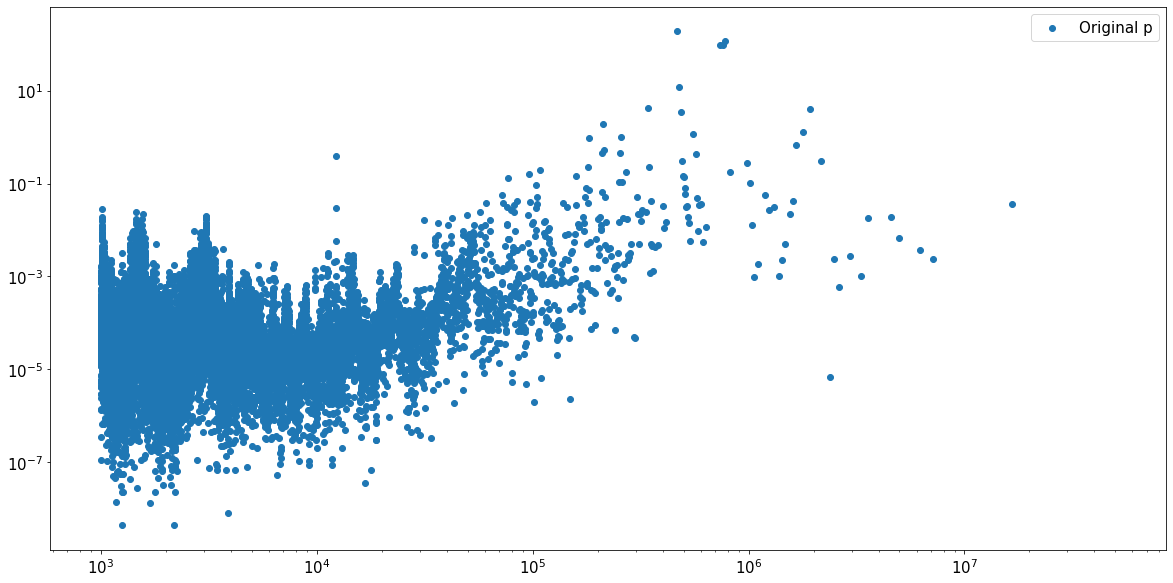

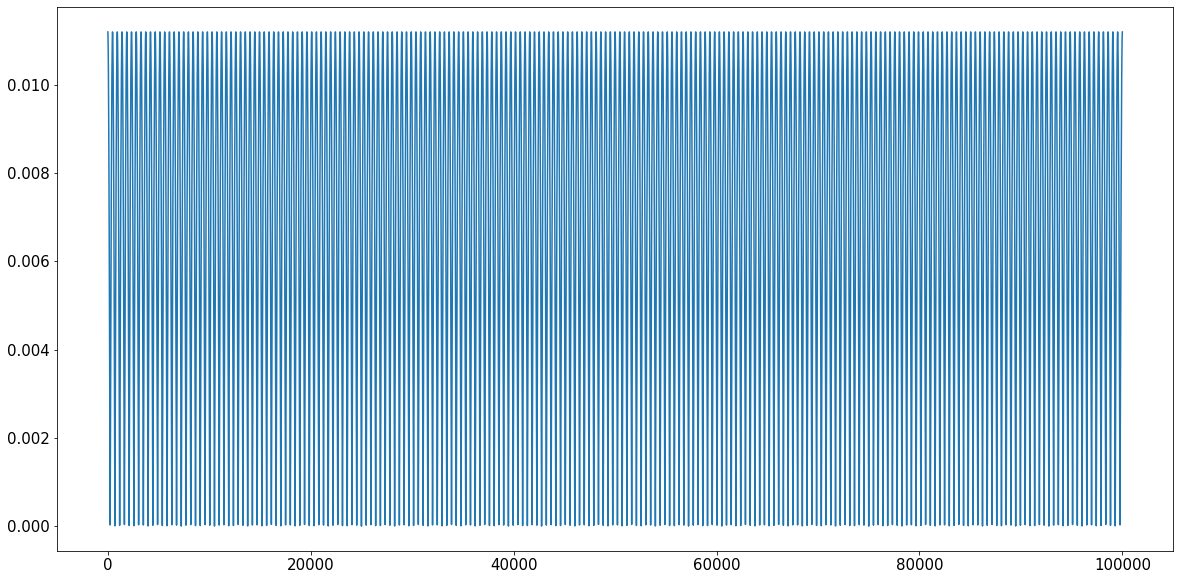

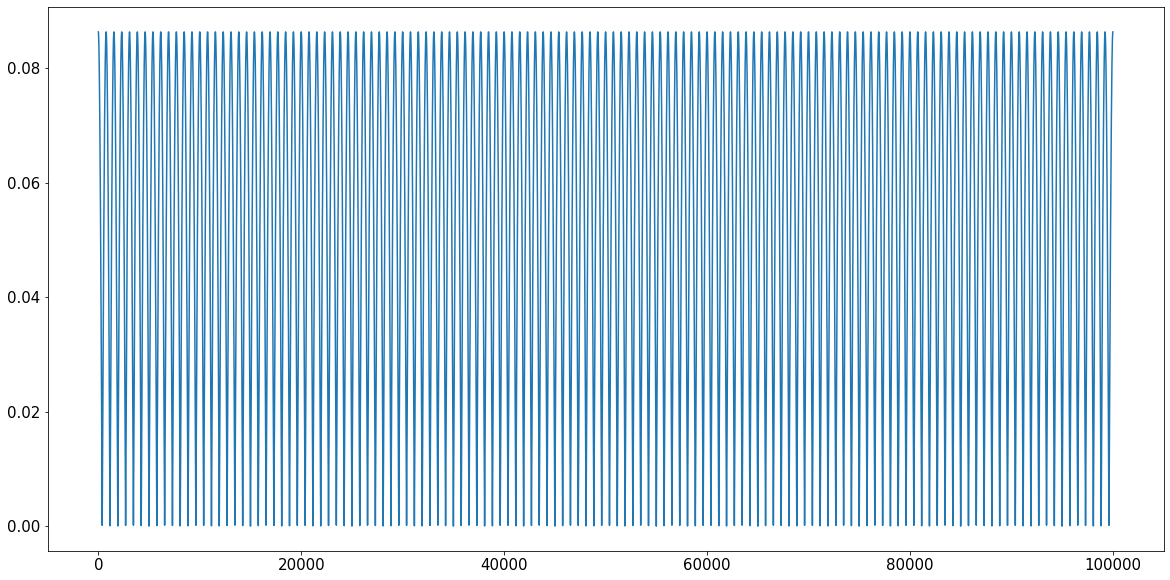

Calc: 0.006380856781657013
Single Freq: 0.011196756348018226
AstDys Sin(Inc): 0.011229
Calc: 0.044459585233179305
Single Freq: 0.08635779326434247
AstDys Ecc 0.0891079


In [323]:
#make copies of the FFT outputs
Yp_f = (np.fft.rfft(ph))
Yq_f = (np.fft.rfft(qh))
Yh_f = (np.fft.rfft(hh))
Yk_f = (np.fft.rfft(kh))

print(Yp_f.max())
print(Yq_f.max())
print(Yh_f.max())
print(Yk_f.max())

imax = len(Yp)
#disregard antyhing with a period shorter than 5000 years
freqlim = 1./10000.
#disregard frequencies for which any planet has power at higher than 10% the max
pth = 0.75

spread = 0
#'''
test = np.zeros(len(Yp_f))
test_2 = np.zeros(len(Yq_f))
test_3 = np.zeros(len(Yq_f)) 
test_4 = np.zeros(len(Yq_f))
if spread > 0:
    test[ipmax-spread:ipmax+spread] = Yp[ipmax-spread:ipmax+spread]
    test_2[iqmax-spread:iqmax+spread] = Yq[iqmax-spread:iqmax+spread]
    test_3[ihmax-spread:ihmax+spread] = Yh[ihmax-spread:ihmax+spread]
    test_4[ikmax-spread:ikmax+spread] = Yk[ikmax-spread:ikmax+spread]
else:
    test[ipmax] = Yp[ipmax]
    test_2[iqmax] = Yq[iqmax]
    test_3[ihmax] = Yh[ihmax]
    test_4[ikmax] = Yk[ikmax]

print(ipmax,iqmax,ihmax,ikmax)
for i in range(0,imax-1):
    if (pYunew[i]>pth*pumax or pYjnew[i]>pth*pjmax or pYsnew[i]>pth*psmax 
       or pYnnew[i]>pth*pnmax or freq[i]>freqlim):
        Yp_f[i]=0
    if (qYunew[i]>pth*qumax or qYnnew[i]>pth*qjmax or qYsnew[i]>pth*qsmax 
       or qYjnew[i]>pth*qnmax or freq[i]>freqlim):
        Yq_f[i]=0
    if (hYunew[i]>pth*humax or hYnnew[i]>pth*hjmax or hYjnew[i]>pth*hsmax 
       or hYsnew[i]>pth*hnmax or freq[i]>freqlim):
        Yh_f[i]=0
    if (kYunew[i]>pth*kumax or kYnnew[i]>pth*kjmax or kYjnew[i]>pth*ksmax 
       or kYsnew[i]>pth*knmax or freq[i]>freqlim):
        Yk_f[i]=0

p_f = np.fft.irfft(Yp_f,len(p))
q_f = np.fft.irfft(Yq_f,len(q))
h_f = np.fft.irfft(Yh_f,len(h))
k_f = np.fft.irfft(Yk_f,len(k))

i_p = np.fft.irfft(test,len(p))
i_q = np.fft.irfft(test_2,len(q))
i_h = np.fft.irfft(test_3,len(h))
i_k = np.fft.irfft(test_4,len(k))

print(len(Yp_f))
print(len(freq))

plt.scatter(1/freq,Yp_f,label='Filtered/Windowed p')
plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.show()
#plt.scatter(freq,test)
plt.scatter(1/freq,(np.fft.rfft(ph)),label='Original p')
plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.show()

#plt.scatter(freq,Yp_f)
#plt.scatter(freq,np.abs(np.fft.rfft(p)))
#plt.xscale('log')
#plt.yscale('log')
#plt.show()

#plt.scatter(t,p)
#plt.scatter(t,i_p)
#plt.scatter(t,p_f)
#plt.show()


sini = np.sqrt(ph*ph+qh*qh)
sini_f = np.sqrt(p_f*p_f + q_f*q_f)
ecc = np.sqrt(hh*hh+kh*kh)
ecc_f = np.sqrt(h_f*h_f + k_f*k_f)

sini_i = np.sqrt(i_p*i_p + i_q*i_q)
ecc_i = np.sqrt(i_h*i_h + i_k*i_k)

plt.plot(sini_i)
plt.show()
plt.plot(ecc_i)
plt.show()

print('Calc:',np.mean(sini_f))
print('Single Freq:',np.max(sini_i))
print('AstDys Sin(Inc):',0.0112290)
#print('AstDys 2004KF19', 0.0344540)
print('Calc:',np.mean(ecc_f))
print('Single Freq:',np.max(ecc_i))
print('AstDys Ecc', 0.0891079)
#print('AstDys 2004KF19:', 0.0578858)

# plot p,q
#note: not sure why there are stray dots not on the circle
plt.rcParams["figure.figsize"] = (10, 10)
plt.scatter(p,q,label='osculating');
plt.scatter(p_f,q_f,s=10,label='filtered');
plt.axhline(y=0,c='k');
plt.axvline(x=0,c='k');
plt.xlabel('p');
plt.xlabel('q');
plt.legend();


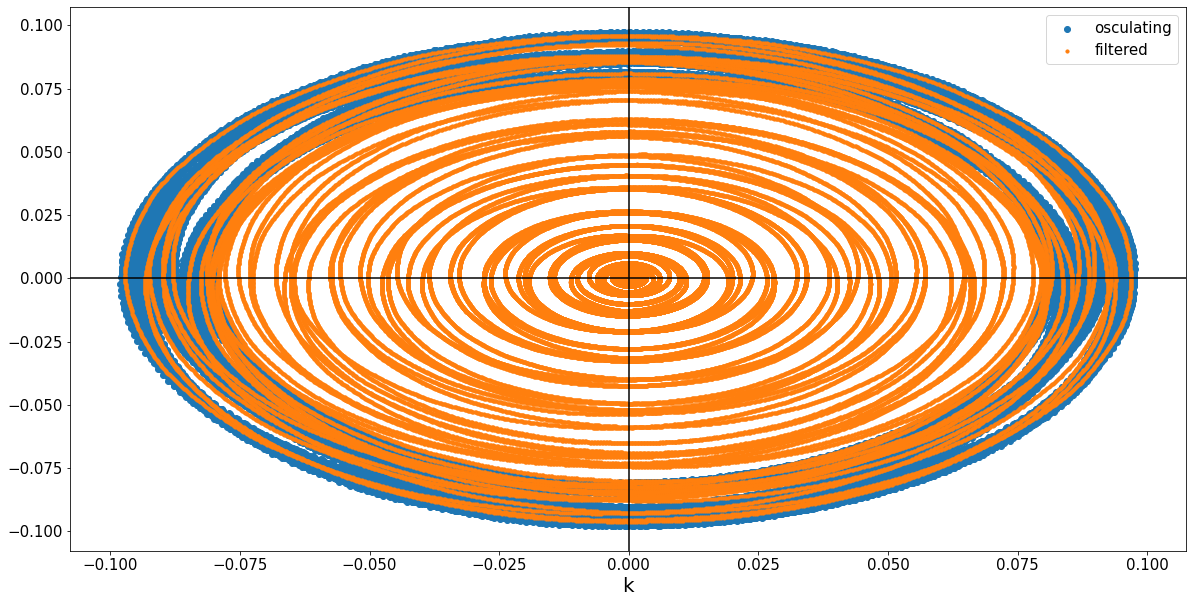

In [69]:
#plot h,k
#note: not sure why there are stray dots not on the circle
plt.scatter(h,k,label='osculating');
plt.scatter(h_f,k_f,s=10,label='filtered');
plt.axhline(y=0,c='k');
plt.axvline(x=0,c='k');
plt.xlabel('h');
plt.xlabel('k');
plt.legend();
plt.rcParams["figure.figsize"] = (20, 10)

the inclination filtering does get close-ish to the proper value, eccentricity one didn't do much of anything

In [ ]:
#plot oscuilating and filtered sini
plt.scatter(t,sini,s=5,label='osculating');
plt.scatter(t,sini_f,s=0.5,label='filtered');
#plot the range from Huang et al for this object
plt.axhline(y=np.sin(11.2669*np.pi/180),c='k',label='analytical proper sini range');
plt.axhline(y=np.sin(11.4669*np.pi/180),c='k');
plt.axhline(y=np.sin(11.0669*np.pi/180),c='k');
plt.xlabel('time(years)');
plt.ylabel('sin(i)');
plt.legend();

plt.xlim([0,t[-1]]);

In [ ]:
#plot oscuilating and filtered eccentrcicity
plt.scatter(t,ecc,s=5,label='osculating');
plt.scatter(t,ecc_f,s=0.5,label='filtered');

plt.xlabel('time(years)');
plt.ylabel('eccentricity');
plt.legend();

plt.xlim([0,t[-1]]);
plt.ylim([ecc.min()-0.01,ecc.max()+0.01]);

# below here are some random attempts with filters from the scipy signal package

In [ ]:
import scipy.signal
quality_factor = 3.
nmax = len(freq)
filt = freq[ipnmax]
print(1/freq[ipnmax])
fs = 1/500.

#Infinite Impulse Response Notch Filter
#Give the function a frequnecy to filter out and it will filter that specific frequency
b_f, a_f = signal.iirnotch(filt,quality_factor,fs=fs)

print(b_f, a_f)
alt_f_p = signal.filtfilt(b_f, a_f, p)
alt_f_q = signal.filtfilt(b_f, a_f, q)

tY = np.fft.rfft(alt_f_p)
ptY = np.abs(tY)

ffreq, fh = signal.freqz(b_f,a_f, fs=2.*np.pi,worN=nmax);

#Butterworth Bandstop Filter
#A digital filter that 
b, a = signal.butter(1, [freq[ipnmax-10],freq[ipnmax+10]], btype='bandstop',fs=fs)


#b_n, a_n = signal.butter(2, [freq[ipnmax-5],freq[ipnmax+25]], btype='bandstop')
print(b,a)
#alt_f_p2 = signal.filtfilt(b,a,p)
#alt_f_q2 = signal.filtfilt(b, a, q)

alt_f_p2 = signal.lfilter(b,a,p)
alt_f_q2 = signal.lfilter(b, a, q)

print(np.sum(alt_f_p2-p))

tY_2 = np.fft.rfft(alt_f_p2)
ptY2 = np.abs(tY_2)

ffreq2, fh2 = signal.freqz(b,a,fs=2*np.pi,worN=nmax)

plt.scatter(ffreq*fs/(2.*np.pi), np.abs(fh),
         c='r', label='Bandpass filter');

plt.scatter(freq, pYp,
         c='b', label='before filtering')
plt.scatter(freq, ptY,
         c='g', label='after filtering');

plt.legend();
 
plt.xlabel('Frequency [yr^{-1}]', fontsize=20);
plt.ylabel('Magnitude [dB]', fontsize=20);
plt.xscale('log');
plt.yscale('log');
plt.title('Notch Filter', fontsize=20);
plt.show()

#=================================================
plt.scatter(ffreq2*fs/(2.*np.pi), np.abs(fh2*fh),
         c='r', label='Bandpass filter');

plt.scatter(freq, pYp,
         c='b', label='before filtering')
plt.scatter(freq, ptY2,
         c='g', label='after filtering');

plt.legend();
 
plt.xlabel('Frequency [yr^{-1}]', fontsize=20);
plt.ylabel('Magnitude [dB]', fontsize=20);
plt.xscale('log');
plt.yscale('log');
plt.title('Butterworth Filter', fontsize=20);

plt.show()

In [ ]:
plt.scatter(np.arange(0,len(ptY)),np.fft.ifft(ptY)+0.8, s=0.5)
plt.scatter(np.arange(0,len(ptY2)),np.fft.ifft(ptY2)+0.4, s=0.5)
plt.scatter(np.arange(0,len(ptY2)),np.fft.ifft(pYp), s=0.5)
plt.show()

In [ ]:
alt_i_filtered = np.sqrt(alt_f_q*alt_f_q + alt_f_p*alt_f_p)
alt_i_filtered2 = np.sqrt(alt_f_q2*alt_f_q2 + alt_f_p2*alt_f_p2)
plt.figure()
plt.axes().set_aspect('equal')
plt.scatter(q,p)
plt.scatter(alt_f_q,alt_f_p,s=0.9)
plt.axhline(y=0)
plt.axvline(x=0)
plt.show()
print(alt_i_filtered)

Omega_new = np.arctan2(alt_f_p,alt_f_q)
inc_new = np.arcsin(alt_f_p/np.sin(Omega_new))

p_off = alt_f_p - np.mean(alt_f_p)
q_off = alt_f_q - np.mean(alt_f_q)

Omega_off = np.arctan2(p_off,q_off)
inc_off = np.arcsin(p_off/np.sin(Omega_off))
plt.plot(inc)
plt.plot(inc_new)
plt.plot(inc_off)
plt.show()

print(np.mean(inc_new))
print(np.mean(inc_off))
print('AstDys 2004KF19:',np.arcsin(0.0344540))

In [ ]:
plt.scatter(t,sini,s=5,label='osculating')
plt.scatter(t,alt_i_filtered,s=0.05,label='filtered')
#plt.axhline(y=np.sin(11.2669*np.pi/180))
#plt.axhline(y=np.sin(11.4669*np.pi/180))
#plt.axhline(y=np.sin(11.0669*np.pi/180))
plt.xlabel('time(years)')
plt.ylabel('sin(i)')
plt.legend()
plt.show()

plt.scatter(t,sini,s=5,label='osculating')
plt.scatter(t,alt_i_filtered2,s=0.05)
#plt.axhline(y=np.sin(11.2669*np.pi/180))
#plt.axhline(y=np.sin(11.4669*np.pi/180))
#plt.axhline(y=np.sin(11.0669*np.pi/180))
plt.xlabel('time(years)')
plt.ylabel('sin(i)')
plt.legend()
plt.show()


#plt.xlim([0,1e8])

In [ ]:
from scipy import signal

#plt.scatter(t,ecc)
plt.plot(Yp)
#plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
n = len(p)
freq2 = np.fft.fftfreq(n,d=dt)
b, a = signal.butter(1, 0.1, btype='highpass')
zi = signal.lfilter_zi(b, a)
print(len(p),len(freq2))
z, _ = signal.lfilter(b, a, p, zi=zi*p[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, p)
plt.figure()
plt.scatter(t, p, alpha=0.75)
#plt.scatter(t, z)
#plt.scatter(t, z2)
plt.scatter(t, y)
plt.show()
print(len(p),len(z))
plt.scatter(1/freq2, np.fft.fft(p), alpha=0.75)
#plt.scatter(1/freq2, np.fft.fft(z))
#plt.scatter(1/freq2, np.fft.fft(z2))
plt.scatter(1/freq2, np.fft.fft(y))
plt.yscale('log')
plt.xscale('log')
plt.show()

1.3000000000000001e-05 1.32e-05 1.35e-05
50001 50001


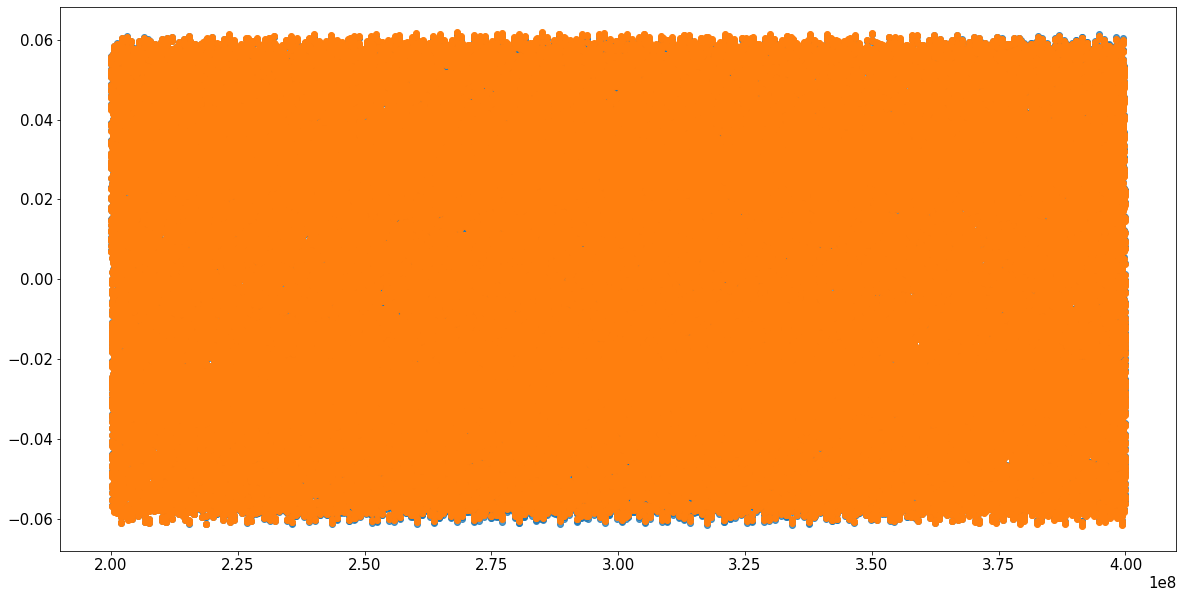

[ 0.02283639  0.02004361  0.01782442 ... -0.00824397 -0.00354802
  0.00097215]
100000 50001


NameError: name 'freq2' is not defined

In [20]:

print(freq[ihjmax-5], freq[ihjmax+5],freq[ihjmax+20])
b, a = signal.butter(1, [freq[ihjmax-5],freq[ihjmax+5]], btype='bandstop')
zi = signal.lfilter_zi(b, a)
print(len(pYp),len(freq))
z, _ = signal.lfilter(b, a, hj, zi=zi*hj[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, hj)
plt.figure()
plt.scatter(t, hj, alpha=0.75)
#plt.scatter(t, z)
#plt.scatter(t, z2)
plt.scatter(t, y)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

print(y)

print(len(hj),len(freq))
new = np.fft.fft(y)
plt.scatter(1/freq2,np.fft.fft(hj))
plt.scatter(1/freq2,new)
plt.vlines(1/freq[ihjmax],ymin=1e-3,ymax=1e3)
plt.xscale('log')
plt.yscale('log')

In [ ]:
from scipy.signal import peak_widths,find_peaks
print(ihjmax, freq[ihjmax],1/freq[ihjmax])
peaks, _ = find_peaks(pYpj)
plt.plot(freq[1:],pYhj[1:])
plt.vlines(freq[ihjmax],ymin=1e-3,ymax=1e3)
results_full = peak_widths(pYpj, peaks, rel_height=5)
print(np.array(results_full))
#plt.hlines(*results_full[1:], color="C3")
plt.yscale('log')
plt.xscale('log')

In [ ]:
print(str(3).zfill(3))

In [61]:
print(1/g,1/s)
print(1/g5,1/g6,1/g7,1/g8,1/s6,1/s7,1/s8)
print(1/z1,1/z2,1/z3,1/z4,1/z5,1/z6,1/z7,1/z8,1/z9)

3962.361331220285 10001.0
305660.37735849054 45924.87597448618 420779.2207792208 1934328.358208955 49202.73348519362 433444.81605351163 1878260.8695652175
3223.040894429348 2883.6222555174613 3041.64852205142 4714.824216844513 4734.805373513511 10186.513706517091 5165.452055286076 1848.8865485187862 1296.2331690302053


In [62]:
print(freq,len(freq))

[0.00000000e+00 9.99900010e-08 1.99980002e-07 ... 4.99750025e-04
 4.99850015e-04 4.99950005e-04] 5001


In [64]:
print(ihjmax,ihsmax,ihumax,ihnmax)
print(1/freq[ihjmax])

138 33 218 33
72471.01449275362


In [77]:
print(astdys)

            Name  mag.      a(AU)         e      sinI n(deg/yr)     g("/y)  \
0          15760  7.10  43.980109  0.070356  0.043997  1.237778   0.417884   
1          15789  6.95  39.458334  0.184154  0.101916  1.456473  -0.916329   
2          15807  7.35  43.798207  0.072977  0.033014  1.245505   0.501449   
3          15809  7.64  42.328679  0.220231  0.224428  1.310848  -0.486295   
4          15810  7.71  39.460954  0.124711  0.059918  1.456372  -2.008044   
...          ...   ...        ...       ...       ...       ...        ...   
1181  2015 RS245  8.22  40.418790  0.098893  0.268945  1.404816   0.406734   
1182   2015 UK84  6.81  49.611299  0.247131  0.380083  1.033066   0.114719   
1183   2016 BP81  6.06  43.726579  0.064597  0.061642  1.248466   0.520000   
1184   2016 FP59  5.78  46.636875  0.160455  0.090706  1.133517   0.337515   
1185   2016 FW59  6.08  43.433848  0.076211  0.142732  1.261196   0.388558   

        s("/yr)  LCEx1E6   My  
0     -0.420035     0.03  100  